In [1]:
import pandas as pd
import ngeht_predictions
import numpy as np

Welcome to eht-imaging! v 1.2.10 



In [2]:
coreshifts_AA532A38 = pd.read_csv('Table_with_Separate_Uncertainties.csv')


In [3]:
coreshifts_AA532A38 = coreshifts_AA532A38[0:5]

In [4]:
freq = np.linspace(1, 350, 1600)  # Example frequency range in GHz


ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=coreshifts_AA532A38['b_mas_GHz'][0], a=coreshifts_AA532A38['a_mas'][0],)   

array([ 7.84      ,  8.28431211,  8.59360906, ..., 10.31290544,
       10.31290986, 10.31291429], shape=(1600,))

In [5]:
len(coreshifts_AA532A38)

5

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Core Shift (mas)')

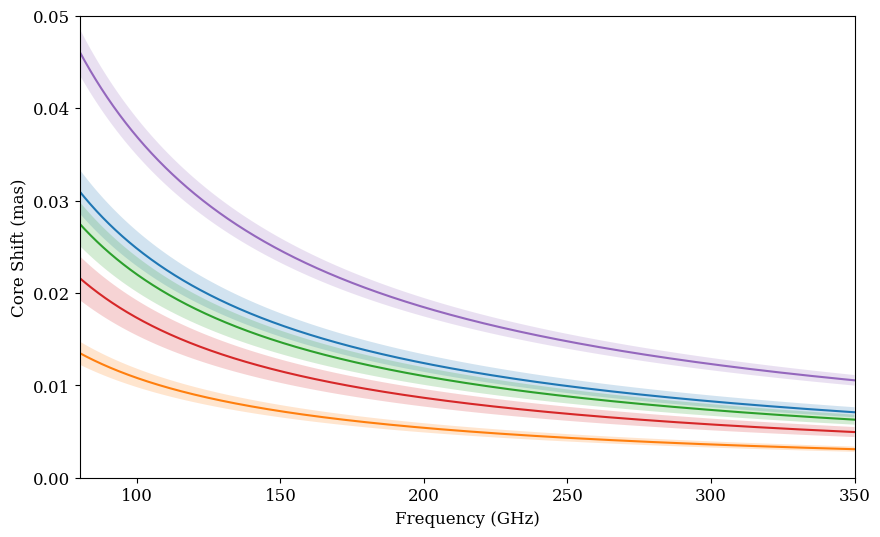

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(coreshifts_AA532A38)):
    ax.plot(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0), label='Core Shift')
    ax.fill_between(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i] - coreshifts_AA532A38['b_mas_GHz_err'][i], a=0), ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i] + coreshifts_AA532A38['b_mas_GHz_err'][i], a=0), alpha=0.2)

ax.set_xlim(80,350)
ax.set_ylim(0, 0.05)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Core Shift (mas)')

In [8]:
fn = '/Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits'

params = 2.4164853793624266, -0.1188661524727489

freq1 = 230# GHz
freq2 = 345# GHz

tenna_list_2 = ['AP', 'AZ']
ngeht_2tennas = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_2tennas.load_uvfits()
ngeht_2tennas.select_antennas(tenna_list=tenna_list_2)
ngeht_2tennas.grouped_table_time()
ngeht_2tennas.remove_scans_tenna_set(tenna_list=tenna_list_2)

ngeht_2tennas.thermal_atm.calculate_atm_error(n_runs=10000)
ngeht_2tennas.thermal_atm.calculate_thermal_error(freq1=freq1, freq2=freq2, params=params)

tenna_list_3 = ['AP', 'AZ', 'JC']
ngeht_3tennas = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_3tennas.load_uvfits()
ngeht_3tennas.select_antennas(tenna_list=tenna_list_3)
ngeht_3tennas.grouped_table_time()
ngeht_3tennas.remove_scans_tenna_set(tenna_list=tenna_list_3)
ngeht_3tennas.thermal_atm.calculate_atm_error(n_runs=10000)
ngeht_3tennas.thermal_atm.calculate_thermal_error(freq1=freq1, freq2=freq2, params=params)
#ngeht_3tennas.thermal_atm.calculate_thermal_error(freq1=freq1, freq2=freq2, params=params)
# ngeht_2tennas.thermal_atm.calculate_thermal_error(freq1=freq1, freq2=freq2, params=params)


Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x116935ee0> is currently

Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x116935ee0> is currently

In [9]:
# four antennas
tenna_list_4 = ['AP', 'AZ', 'JC', 'LM']
ngeht_4tennas = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_4tennas.load_uvfits()
ngeht_4tennas.select_antennas(tenna_list=tenna_list_4)
ngeht_4tennas.grouped_table_time()
ngeht_4tennas.remove_scans_tenna_set(tenna_list=tenna_list_4)
ngeht_4tennas.thermal_atm.calculate_atm_error(n_runs=10000,)
ngeht_4tennas.thermal_atm.calculate_thermal_error(freq1=freq1, freq2=freq2, params=params)

tenna_list_all = ['AP', 'AZ', 'JC', 'LM', 'PV', 'SM', 'SP']
ngeht_alltennas = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_alltennas.load_uvfits()
ngeht_alltennas.select_antennas(tenna_list=tenna_list_all)
ngeht_alltennas.grouped_table_time()
#ngeht_alltennas.remove_scans_tenna_set(tenna_list=['AP', 'AZ', 'JC', 'LM', 'PV', 'SM', 'SP'])
ngeht_alltennas.thermal_atm.calculate_atm_error(n_runs=10000,)
ngeht_alltennas.thermal_atm.calculate_thermal_error(freq1=freq1, freq2=freq2, params=params)

Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x116935ee0> is currently

Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x116935ee0> is currently

In [10]:
tenna_list_2 = ['AP', 'AZ']
ngeht_2tennas_phase_05 = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_2tennas_phase_05.load_uvfits()
ngeht_2tennas_phase_05.select_antennas(tenna_list=tenna_list_2)
ngeht_2tennas_phase_05.grouped_table_time()
ngeht_2tennas_phase_05.remove_scans_tenna_set(tenna_list=tenna_list_2)
ngeht_2tennas_phase_05.thermal_atm.calculate_atm_error(n_runs=10000, phase_error=0.5,)

tenna_list_3 = ['AP', 'AZ', 'JC']
ngeht_3tennas_phase_05 = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_3tennas_phase_05.load_uvfits()
ngeht_3tennas_phase_05.select_antennas(tenna_list=tenna_list_3)
ngeht_3tennas_phase_05.grouped_table_time()    
ngeht_3tennas_phase_05.remove_scans_tenna_set(tenna_list=tenna_list_3)
ngeht_3tennas_phase_05.thermal_atm.calculate_atm_error(n_runs=10000, phase_error=0.5,)

tenna_list_4 = ['AP', 'AZ', 'JC', 'LM']
ngeht_4tennas_phase_05 = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_4tennas_phase_05.load_uvfits()
ngeht_4tennas_phase_05.select_antennas(tenna_list=tenna_list_4)
ngeht_4tennas_phase_05.grouped_table_time()
ngeht_4tennas_phase_05.remove_scans_tenna_set(tenna_list=tenna_list_4)
ngeht_4tennas_phase_05.thermal_atm.calculate_atm_error(n_runs=10000, phase_error=0.5,)

tenna_list_all = ['AP', 'AZ', 'JC', 'LM', 'PV', 'SM', 'SP']
ngeht_alltennas_phase_05 = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_alltennas_phase_05.load_uvfits()
ngeht_alltennas_phase_05.select_antennas(tenna_list=tenna_list_all)
ngeht_alltennas_phase_05.grouped_table_time()
#ngeht_alltennas_phase_05.remove_scans_tenna_set(tenna_list=tenna_list_all)
ngeht_alltennas_phase_05.thermal_atm.calculate_atm_error(n_runs=10000, phase_error=0.5,)


'--------–––-------------------------------------------------------------------------------'





Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x116935ee0> is currently

Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x116935ee0> is currently

Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x116935ee0> is currently

Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x116935620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x116935ee0> is currently

'--------–––-------------------------------------------------------------------------------'

In [11]:

# tenna_list=['AP', 'AZ', 'JC', 'LM', 'PV', 'SM', 'SP']

# ngeht_alltennas = ngeht_predictions.load(uvfits=fn, scans=True)
# ngeht_alltennas.load_uvfits()
# ngeht_alltennas.remove_antennas(tenna_list=['AA'])

# ngeht_alltennas.select_antennas(tenna_list=tenna_list)
# ngeht_alltennas.grouped_table_time()
# ngeht_alltennas.thermal_atm.calculate_atm_error(n_runs=10000)

In [12]:

set_tenna_current = set(np.unique(np.hstack((np.unique(ngeht_alltennas.table['tele1']), np.unique(ngeht_alltennas.table['tele2'])))))

if set_tenna_current == set(['AP', 'AZ', 'JC', 'LM', 'PV', 'SM', 'SP']):
    print("True")

True


In [13]:
np.mean(np.std(ngeht_2tennas.thermal_atm.atm_obs_angles, axis=1)), np.std(ngeht_2tennas.thermal_atm.atm_obs_angles)

(np.float64(0.01479172986357386), np.float64(0.015020539728080665))

In [14]:
atm_noise = np.mean(np.std(ngeht_2tennas.thermal_atm.atm_obs_angles, axis=1))
atm_noise_3tennas = np.mean(np.std(ngeht_3tennas.thermal_atm.atm_obs_angles, axis=1))
atm_noise_4tennas = np.mean(np.std(ngeht_4tennas.thermal_atm.atm_obs_angles, axis=1))
atm_noise_alltennas = np.mean(np.std(ngeht_alltennas.thermal_atm.atm_obs_angles, axis=1))

atm_noise_2tennas_phase_05 = np.mean(np.std(ngeht_2tennas_phase_05.thermal_atm.atm_obs_angles,axis=1))
atm_noise_3tennas_phase_05 = np.mean(np.std(ngeht_3tennas_phase_05.thermal_atm.atm_obs_angles, axis=1))
atm_noise_4tennas_phase_05 = np.mean(np.std(ngeht_4tennas_phase_05.thermal_atm.atm_obs_angles, axis=1))
atm_noise_alltennas_phase_05 = np.mean(np.std(ngeht_alltennas_phase_05.thermal_atm.atm_obs_angles, axis=1))

In [15]:
len(ngeht_2tennas.thermal_atm.thermal_noise_dualband_per_time)

19

In [16]:
mean_uncertainty = np.mean(ngeht_2tennas.thermal_atm.thermal_noise_dualband_per_time)
mean_uncertainty_3tennas = np.mean(ngeht_3tennas.thermal_atm.thermal_noise_dualband_per_time)
mean_uncertainty_4tennas = np.mean(ngeht_4tennas.thermal_atm.thermal_noise_dualband_per_time)
mean_uncertainty_alltennas = np.mean(ngeht_alltennas.thermal_atm.thermal_noise_dualband_per_time)

In [17]:
coreshifts_AA532A38['Source'][0]

'0148+274'

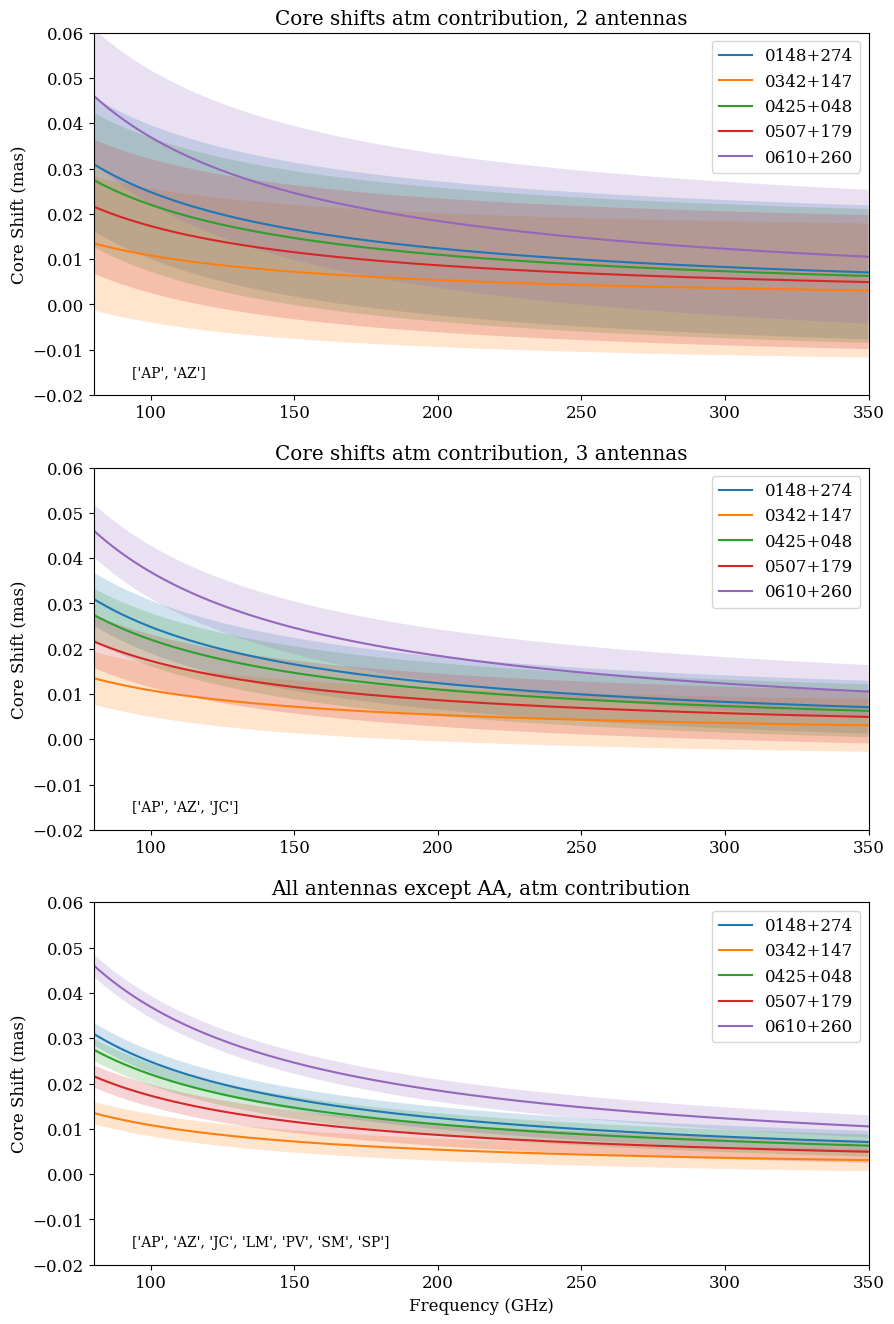

In [18]:
fig, ax = plt.subplots(3,1,figsize=(10, 16))

for i in range(len(coreshifts_AA532A38)):
    ax[0].plot(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0), label=coreshifts_AA532A38['Source'][i])
    ax[0].fill_between(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)-atm_noise, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)+atm_noise, alpha=0.2,)

for i in range(len(coreshifts_AA532A38)):
    ax[1].plot(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0), label=coreshifts_AA532A38['Source'][i])
    ax[1].fill_between(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)-atm_noise_3tennas, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)+atm_noise_3tennas, alpha=0.2,)

for i in range(len(coreshifts_AA532A38)):
    ax[2].plot(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0), label=coreshifts_AA532A38['Source'][i])
    ax[2].fill_between(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)-atm_noise_alltennas, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)+atm_noise_alltennas, alpha=0.2,)

ax[0].set_xlim(80,350)
ax[0].set_ylim(-0.02, 0.06)
ax[0].set_ylabel('Core Shift (mas)')
ax[0].set_title('Core shifts atm contribution, 2 antennas')
ax[0].text(0.05, 0.05, tenna_list_2, transform=ax[0].transAxes, fontsize=10)
ax[0].legend()


ax[1].set_xlim(80,350)
ax[1].set_ylim(-0.02, 0.06)
ax[1].set_ylabel('Core Shift (mas)')
ax[1].set_title('Core shifts atm contribution, 3 antennas')
ax[1].text(0.05, 0.05, tenna_list_3, transform=ax[1].transAxes, fontsize=10)
ax[1].legend()

ax[2].set_xlim(80,350)
ax[2].set_ylim(-0.02, 0.06)
ax[2].set_xlabel('Frequency (GHz)')
ax[2].set_ylabel('Core Shift (mas)')
ax[2].set_title('All antennas except AA, atm contribution')
ax[2].text(0.05, 0.05, tenna_list_all, transform=ax[2].transAxes, fontsize=10)
ax[2].legend()





/var/folders/31/0kzd8c111cj87_n2y45gkb700000gn/T/ipykernel_31288/3639250857.py:16: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(-0.02, 0.06)
/var/folders/31/0kzd8c111cj87_n2y45gkb700000gn/T/ipykernel_31288/3639250857.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(-0.02, 0.06)
/var/folders/31/0kzd8c111cj87_n2y45gkb700000gn/T/ipykernel_31288/3639250857.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(-0.02, 0.06)


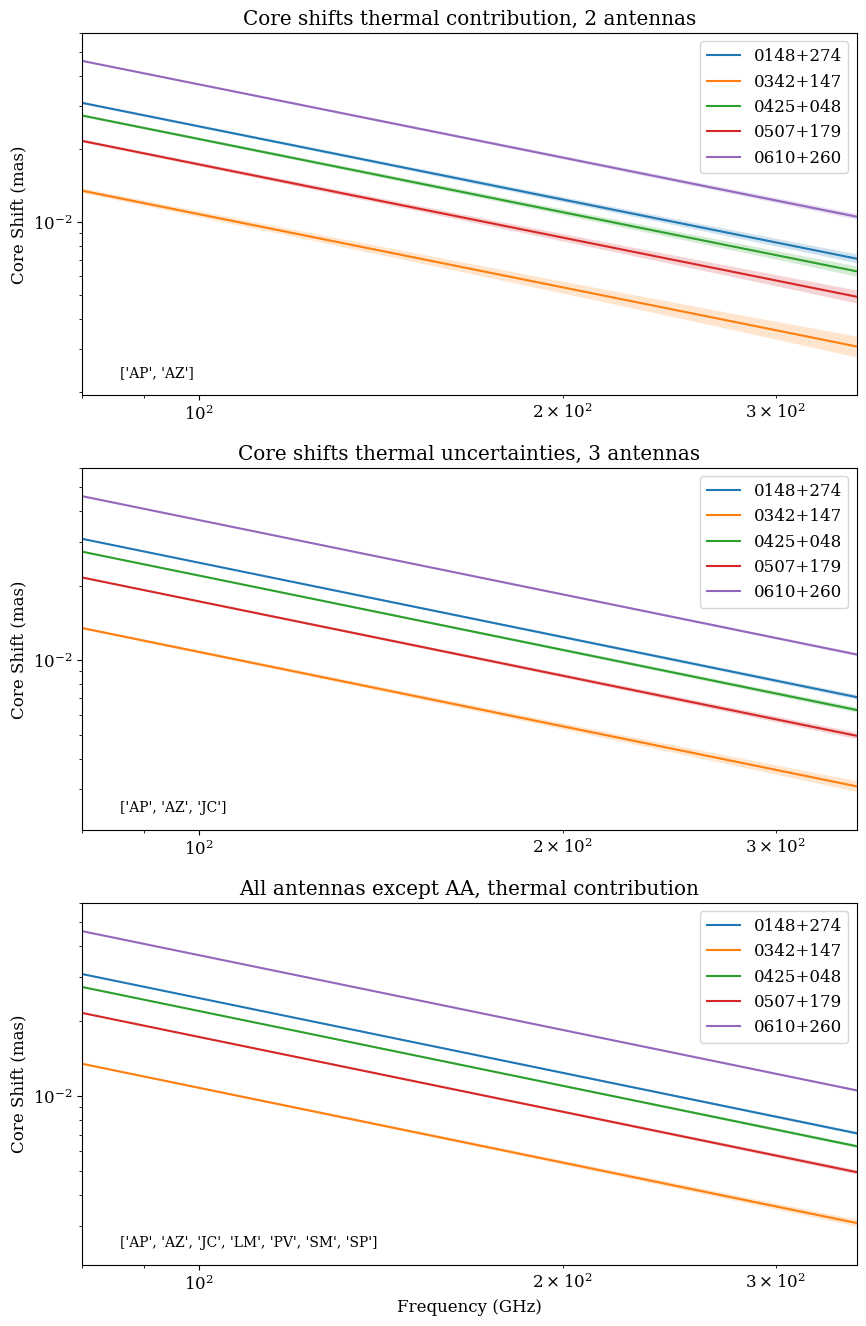

In [19]:
fig, ax = plt.subplots(3,1,figsize=(10, 16))

for i in range(len(coreshifts_AA532A38)):
    ax[0].loglog(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0), label=coreshifts_AA532A38['Source'][i])
    ax[0].fill_between(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)-mean_uncertainty, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)+mean_uncertainty, alpha=0.2)

for i in range(len(coreshifts_AA532A38)):
    ax[1].loglog(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0), label=coreshifts_AA532A38['Source'][i])
    ax[1].fill_between(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)-mean_uncertainty_3tennas, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)+mean_uncertainty_3tennas, alpha=0.2)

for i in range(len(coreshifts_AA532A38)):
    ax[2].loglog(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0), label=coreshifts_AA532A38['Source'][i])
    ax[2].fill_between(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)-mean_uncertainty_alltennas, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)+mean_uncertainty_alltennas, alpha=0.2)

ax[0].set_xlim(80,350)
ax[0].set_ylim(-0.02, 0.06)
ax[0].set_ylabel('Core Shift (mas)')
ax[0].set_title('Core shifts thermal contribution, 2 antennas')
ax[0].text(0.05, 0.05, tenna_list_2, transform=ax[0].transAxes, fontsize=10)
ax[0].legend()

ax[1].set_xlim(80,350)
ax[1].set_ylim(-0.02, 0.06)
ax[1].set_ylabel('Core Shift (mas)')
ax[1].set_title('Core shifts thermal uncertainties, 3 antennas')
ax[1].text(0.05, 0.05, tenna_list_3, transform=ax[1].transAxes, fontsize=10)
ax[1].legend()

ax[2].set_xlim(80,350)
ax[2].set_ylim(-0.02, 0.06)
ax[2].set_xlabel('Frequency (GHz)')
ax[2].set_ylabel('Core Shift (mas)')
ax[2].set_title('All antennas except AA, thermal contribution')
ax[2].text(0.05, 0.05, tenna_list_all, transform=ax[2].transAxes, fontsize=10)
ax[2].legend()

In [20]:
import matplotlib.pyplot as plt

In [21]:
coreshifts_AA532A38 = coreshifts_AA532A38.sort_values(by='b_mas_GHz', ascending=True, ignore_index=True)
coreshifts_AA532A38

,Source,a_mas,a_mas_err,b_mas_GHz,b_mas_GHz_err,a_pc,a_pc_err,b_pc_GHz,b_pc_GHz_err,PA_deg
0,0610+260,6.34,0.06,-3.69,0.20,41.62,0.39,-38.28,2.07,-94.5
1,0148+274,10.32,0.05,-2.48,0.19,86.75,0.42,-47.11,3.61,-40.9
2,0425+048,18.58,0.06,-2.20,0.19,115.05,0.37,-20.66,1.78,-100.7
3,0507+179,4.52,0.05,-1.73,0.19,24.74,0.27,-13.41,1.47,-100.3
4,0342+147,7.15,0.03,-1.08,0.10,61.14,0.26,-23.61,2.19,-88.5


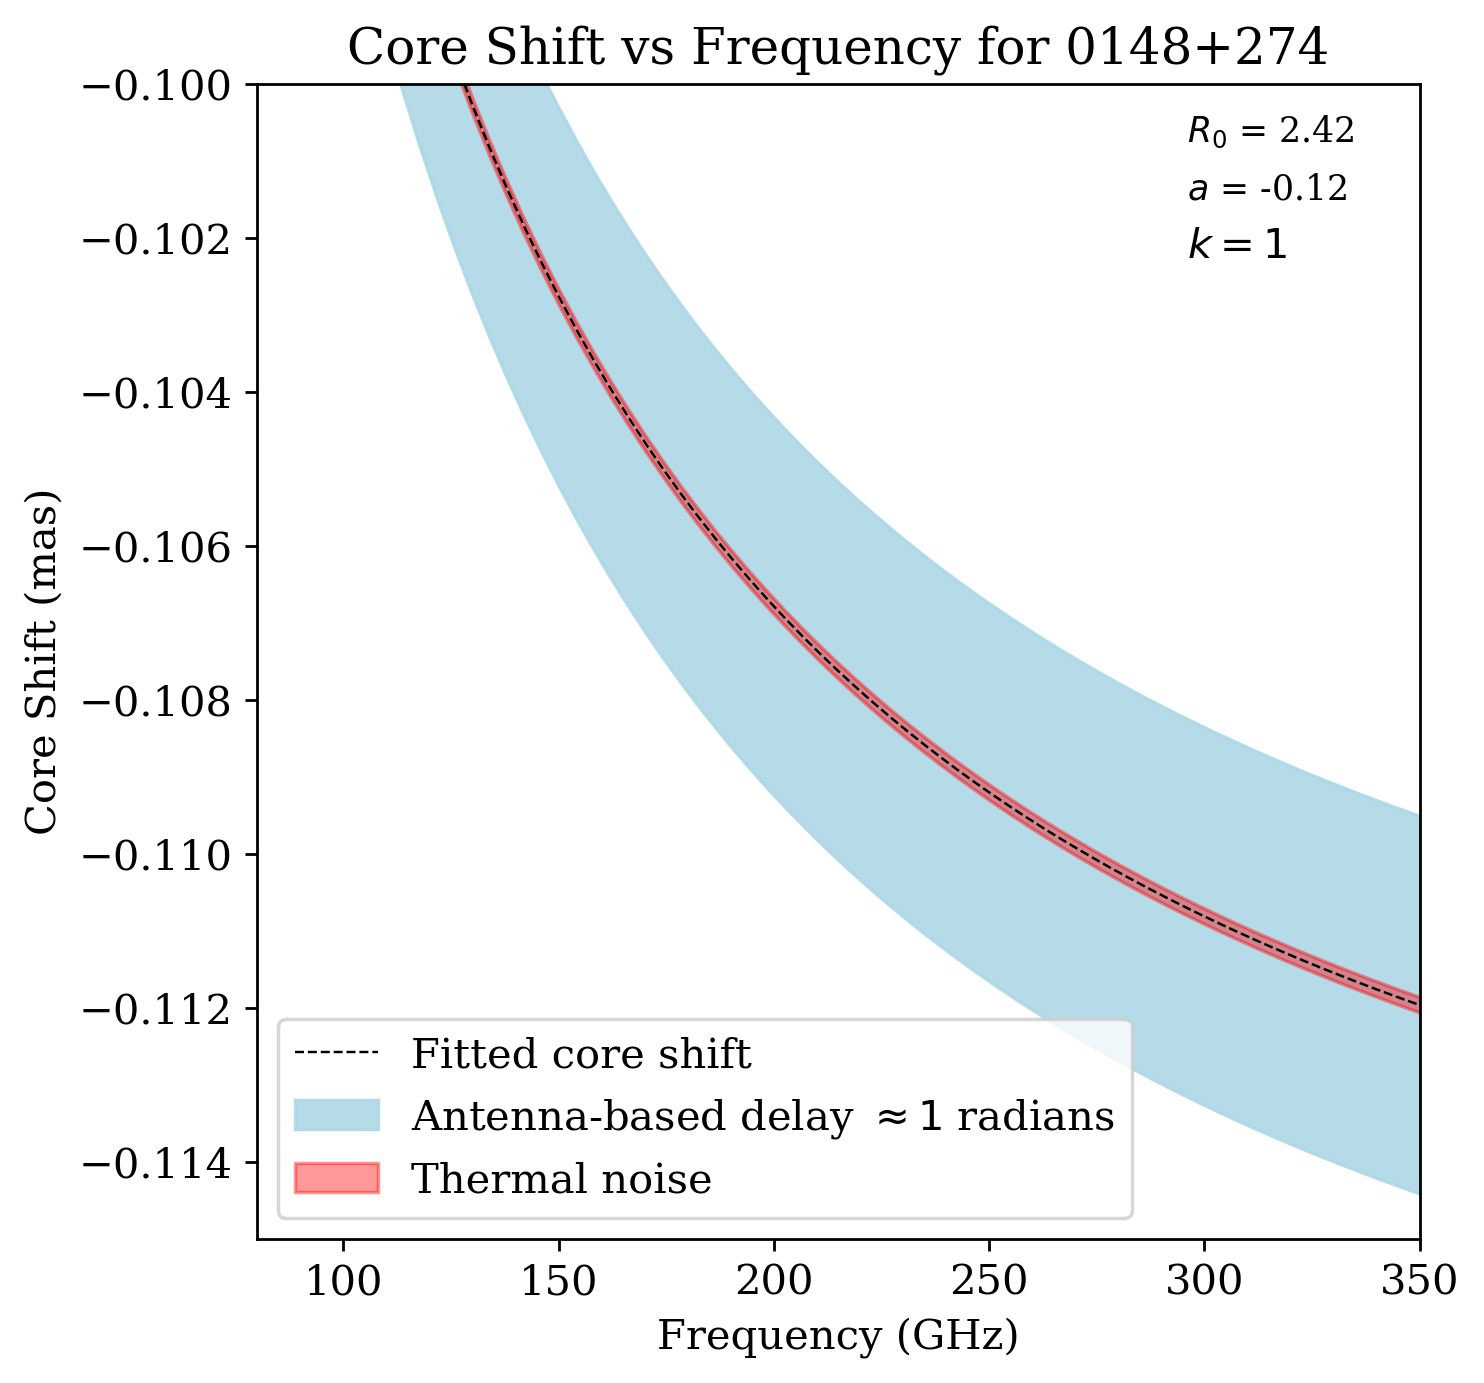

In [22]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=250)

# Fit the core shift data
params = 2.4164853793624266, -0.1188661524727489
min_freq = 1
max_freq = 400

nus = np.linspace(min_freq, max_freq, 100)
  # Frequency range for plotting
# core_shift_freq_k_1(nus, *params)

ax.plot(nus, ngeht_predictions.utilities.core_shift_freq_k(nus, *params), label='Fitted core shift', color='black', linestyle='--', linewidth=0.7)
# ax.errorbar(freqs, core_shifts, yerr=core_shifts_err, color='black', marker='o', linestyle='None', markersize=3, label='Observed Core Shift')

ax.fill_between(nus, ngeht_predictions.utilities.core_shift_freq_k(nus, *params) - atm_noise_alltennas, ngeht_predictions.utilities.core_shift_freq_k(nus, *params) + atm_noise_alltennas, color='lightblue', alpha=0.9, label=r'Antenna-based delay $\approx 1$ radians')
ax.fill_between(nus, ngeht_predictions.utilities.core_shift_freq_k(nus, *params) - mean_uncertainty_alltennas, ngeht_predictions.utilities.core_shift_freq_k(nus, *params) + mean_uncertainty_alltennas, label=r'Thermal noise', color='red', alpha=0.4)

ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Core Shift (mas)')
ax.set_title('Core Shift vs Frequency for 0148+274')
ax.legend()

ax.set_xlim(80, 350)
ax.set_ylim(-0.115, -0.1)

ax.text(0.8, 0.95, f'$R_0$ = {params[0]:.2f}', fontsize=10, transform=ax.transAxes)
ax.text(0.8, 0.90, f'$a$ = {params[1]:.2f}', fontsize=10, transform=ax.transAxes)
ax.text(0.8, 0.85, f'$k= 1$',  transform=ax.transAxes)
plt.show()

In [23]:
params = (2.42, 0)

ngeht_predictions.utilities.core_shift_freq_k(230, R_0=2.42, a=0)

0.010521739130434783

In [24]:
len(coreshifts_AA532A38)

5

In [25]:
import matplotlib.transforms as mtransforms

In [26]:
coreshifts_AA532A38 = pd.read_csv('Table_with_Separate_Uncertainties.csv')
coreshifts_AA532A38 = coreshifts_AA532A38.sort_values(by='b_mas_GHz', ascending=True, ignore_index=True)
coreshifts_AA532A38

,Source,a_mas,a_mas_err,b_mas_GHz,b_mas_GHz_err,a_pc,a_pc_err,b_pc_GHz,b_pc_GHz_err,PA_deg
0,0610+260,6.34,0.06,-3.69,0.20,41.62,0.39,-38.28,2.07,-94.5
1,0839+187,12.21,0.09,-3.67,0.31,102.76,0.76,-70.18,5.93,15.2
2,2201+315,6.78,0.03,-3.22,0.15,29.83,0.13,-18.39,0.86,-135.3
3,1830+285,6.40,0.06,-3.15,0.24,42.50,0.40,-33.34,2.54,-38.5
4,1004+141,11.25,0.04,-2.53,0.13,90.53,0.32,-75.47,3.88,132.2
5,0148+274,10.32,0.05,-2.48,0.19,86.75,0.42,-47.11,3.61,-40.9
6,1458+718,24.57,0.05,-2.38,0.18,192.21,0.39,-35.45,2.68,163.7
7,1219+285,6.95,0.04,-2.38,0.16,19.06,0.11,-7.58,0.51,109.8
8,1845+797,7.23,0.09,-2.29,0.35,7.76,0.10,-2.59,0.40,-38.0
9,0425+048,18.58,0.06,-2.20,0.19,115.05,0.37,-20.66,1.78,-100.7


/var/folders/31/0kzd8c111cj87_n2y45gkb700000gn/T/ipykernel_31288/1279967982.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-0.02, 0.08)


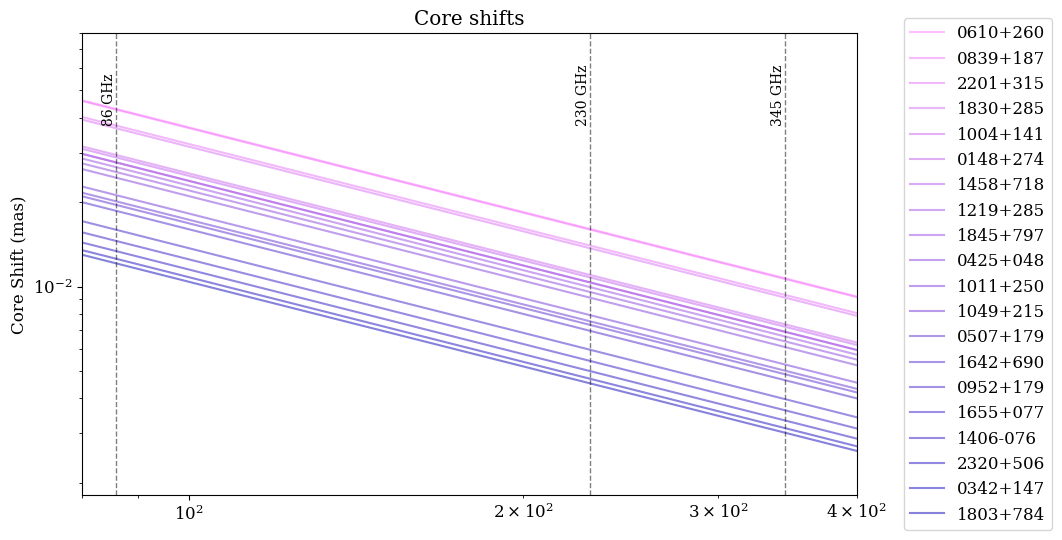

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

freq = np.linspace(1, 400, 1600)  # Example frequency range in GHz

transform = mtransforms.blended_transform_factory(ax.transData,ax.transAxes)


for i in range(len(coreshifts_AA532A38)):
    ax.loglog(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0), label=coreshifts_AA532A38['Source'][i], color=((1 - i/20)/1, (1 - i/20)/2, 1 - i/70, 0.5))


ax.vlines(86, 0, 1, color='black', linestyle='--', alpha=0.5, transform=transform, linewidth=1)
ax.vlines(230, 0, 1, color='black', linestyle='--', alpha=0.5, transform=transform, linewidth=1)
ax.vlines(345, 0, 1, color='black', linestyle='--', alpha=0.5, transform=transform, linewidth=1)

ax.text(86, 0.80, '86 GHz', fontsize=10, transform=transform, rotation=90, verticalalignment='bottom', horizontalalignment='right')
ax.text(230, 0.8, '230 GHz', fontsize=10, transform=transform, rotation=90, verticalalignment='bottom', horizontalalignment='right')
ax.text(345, 0.8, '345 GHz', fontsize=10, transform=transform, rotation=90, verticalalignment='bottom', horizontalalignment='right')


ax.set_xlim(80,400)
ax.set_ylim(-0.02, 0.08)
ax.set_ylabel('Core Shift (mas)')
ax.set_title('Core shifts')

ax.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')

/var/folders/31/0kzd8c111cj87_n2y45gkb700000gn/T/ipykernel_31288/2242670860.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-0.02, 3)


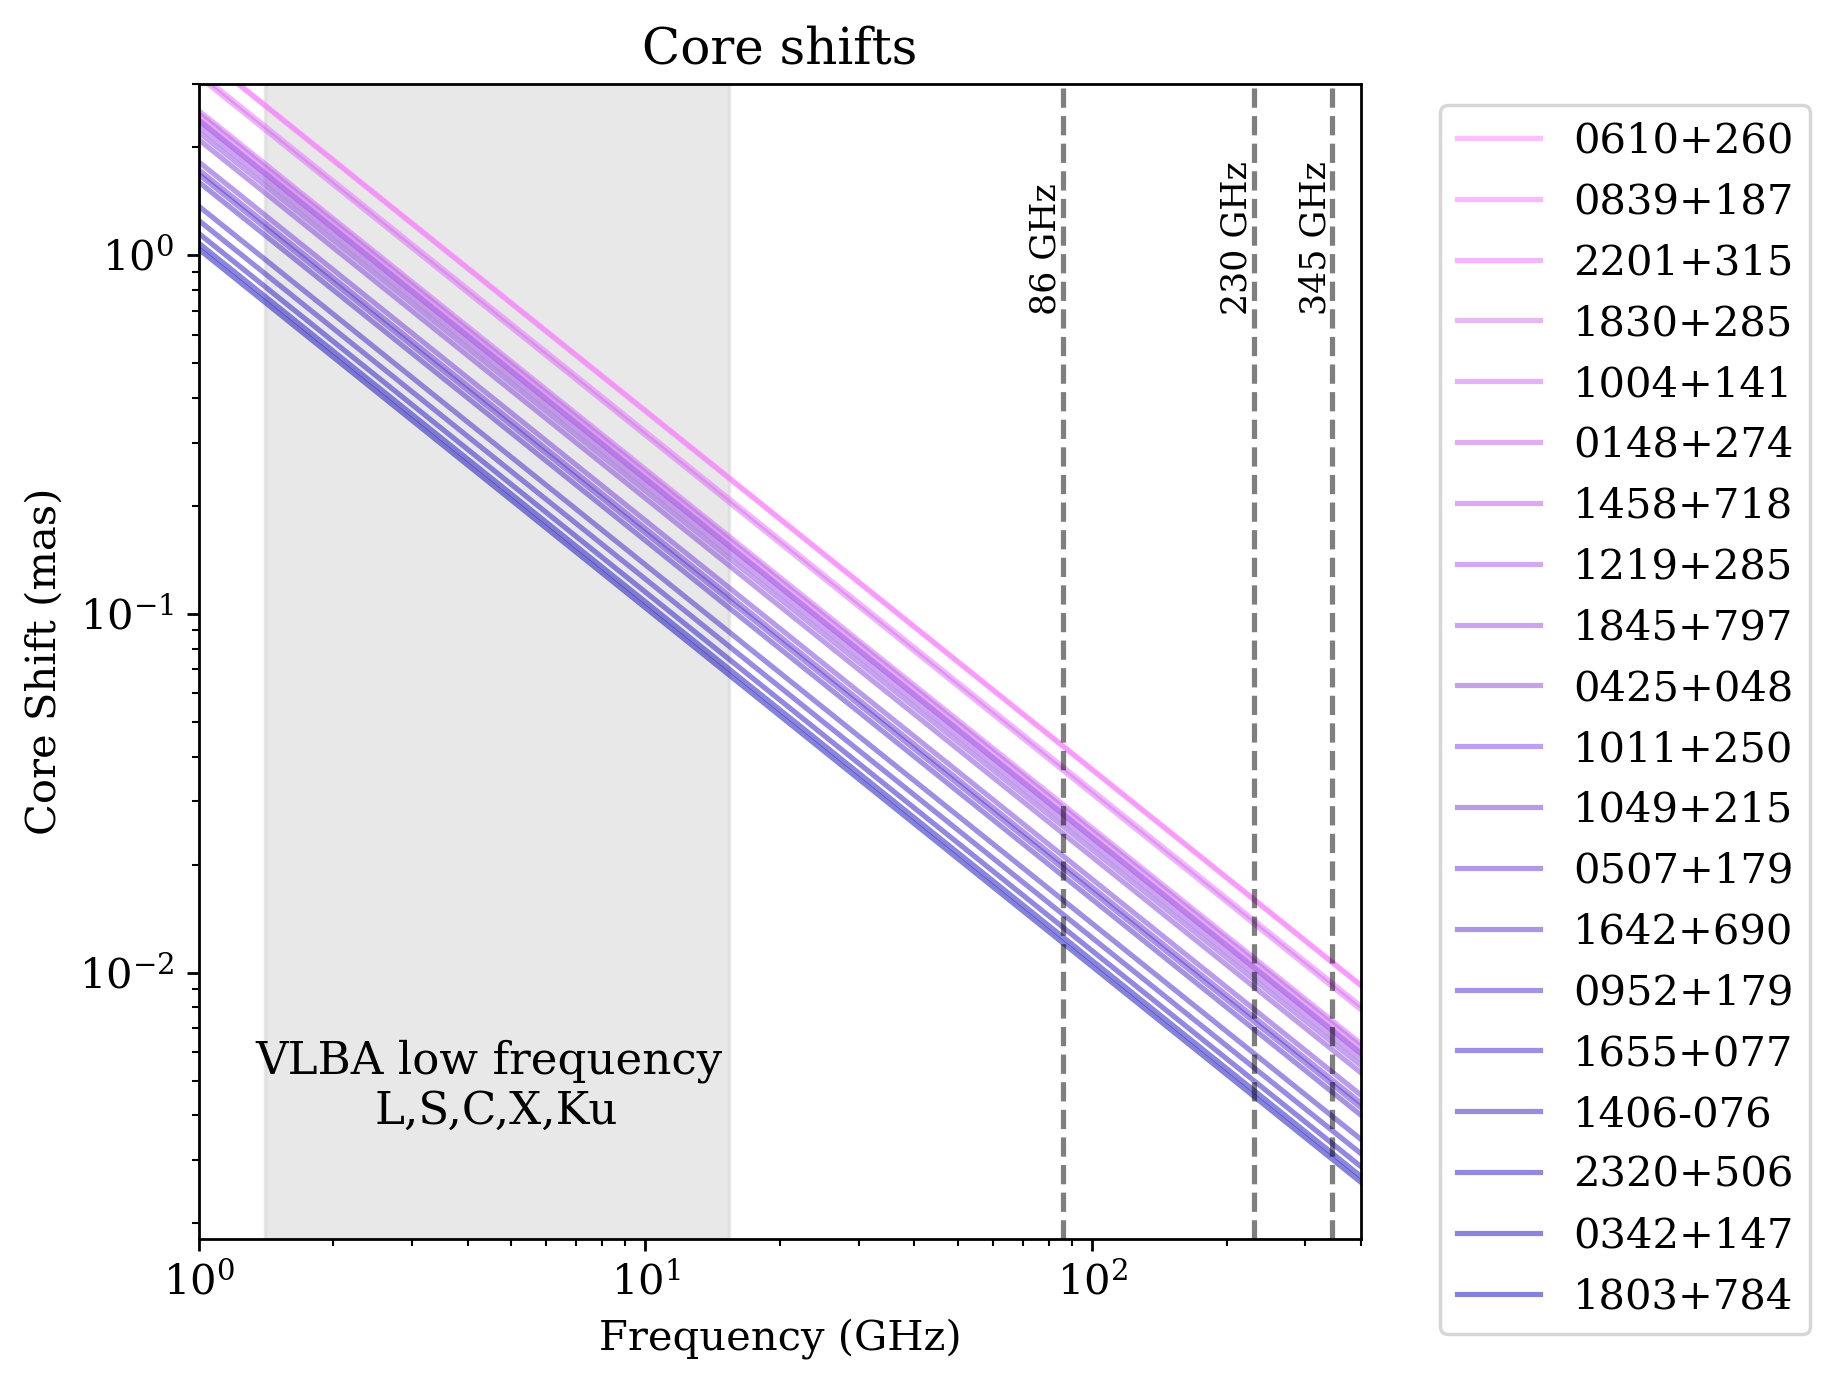

In [152]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=250)

freq = np.linspace(1, 400, 1600)  # Example frequency range in GHz

transform = mtransforms.blended_transform_factory(ax.transData,ax.transAxes)


for i in range(len(coreshifts_AA532A38)):
    ax.loglog(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0), label=coreshifts_AA532A38['Source'][i], color=((1 - i/20)/1, (1 - i/20)/2, 1 - i/70, 0.5))

ax.fill_between

ax.vlines(86, 0, 1, color='black', linestyle='--', alpha=0.5, transform=transform)
ax.vlines(230, 0, 1, color='black', linestyle='--', alpha=0.5, transform=transform)
ax.vlines(345, 0, 1, color='black', linestyle='--', alpha=0.5, transform=transform)

ax.text(86, 0.80, '86 GHz', fontsize=10, transform=transform, rotation=90, verticalalignment='bottom', horizontalalignment='right')
ax.text(230, 0.8, '230 GHz', fontsize=10, transform=transform, rotation=90, verticalalignment='bottom', horizontalalignment='right')
ax.text(345, 0.8, '345 GHz', fontsize=10, transform=transform, rotation=90, verticalalignment='bottom', horizontalalignment='right')

ax.text(.256, 0.1, 'VLBA low frequency \nL,S,C,X,Ku', fontsize=13, transform=ax.transAxes, horizontalalignment='center',)

ax.axvspan(1.41, 15.4, color='lightgray', alpha=0.5, transform=transform,)

ax.set_xlim(1,400)
ax.set_ylim(-0.02, 3)
ax.set_ylabel('Core Shift (mas)')
ax.set_xlabel('Frequency (GHz)')
ax.set_title('Core shifts')

ax.legend(bbox_to_anchor=(1.05, 1.00), loc='upper left')



In [29]:
ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-np.median(coreshifts_AA532A38['b_mas_GHz']), a=0)

array([2.15      , 1.72064565, 1.43423029, ..., 0.00538171, 0.00537836,
       0.005375  ], shape=(1600,))

In [ ]:
k_threshold = []

nu_offset = 86  # Example frequency offset in GHz
k = 1.1
R_0 = -np.median(coreshifts_AA532A38['b_mas_GHz'])

for fr in freq:

    print(fr)

    if fr < nu_offset:
        k_threshold.append(ngeht_predictions.utilities.core_shift_freq_k_1(fr, nu_offset=0 , R_0=R_0, a=0, k=1))
    elif fr >= nu_offset:
        k_threshold.append(ngeht_predictions.utilities.core_shift_freq_k_1(fr, nu_offset=0 , R_0=R_0, a=0, k=k))

len(k_threshold)

1.0
1.24953095684803
1.49906191369606
1.74859287054409
1.99812382739212
2.24765478424015
2.49718574108818
2.7467166979362103
2.99624765478424
3.24577861163227
3.4953095684803
3.74484052532833
3.9943714821763603
4.2439024390243905
4.493433395872421
4.74296435272045
4.99249530956848
5.24202626641651
5.49155722326454
5.74108818011257
5.9906191369606
6.24015009380863
6.48968105065666
6.73921200750469
6.988742964352721
7.23827392120075
7.48780487804878
7.73733583489681
7.98686679174484
8.236397748592871
8.4859287054409
8.73545966228893
8.98499061913696
9.23452157598499
9.48405253283302
9.73358348968105
9.98311444652908
10.232645403377111
10.48217636022514
10.73170731707317
10.9812382739212
11.23076923076923
11.48030018761726
11.72983114446529
11.97936210131332
12.22889305816135
12.47842401500938
12.727954971857411
12.977485928705441
13.22701688555347
13.4765478424015
13.72607879924953
13.97560975609756
14.22514071294559
14.47467166979362
14.72420262664165
14.97373358348968
15.22326454033771

1600

In [112]:
len(k_threshold)
freq[freq > 86]

array([ 86.09005629,  86.33958724,  86.5891182 , ..., 399.50093809,
       399.75046904, 400.        ], shape=(1259,))

Text(0.5, 1.0, 'Typical VLBI core shifts models')

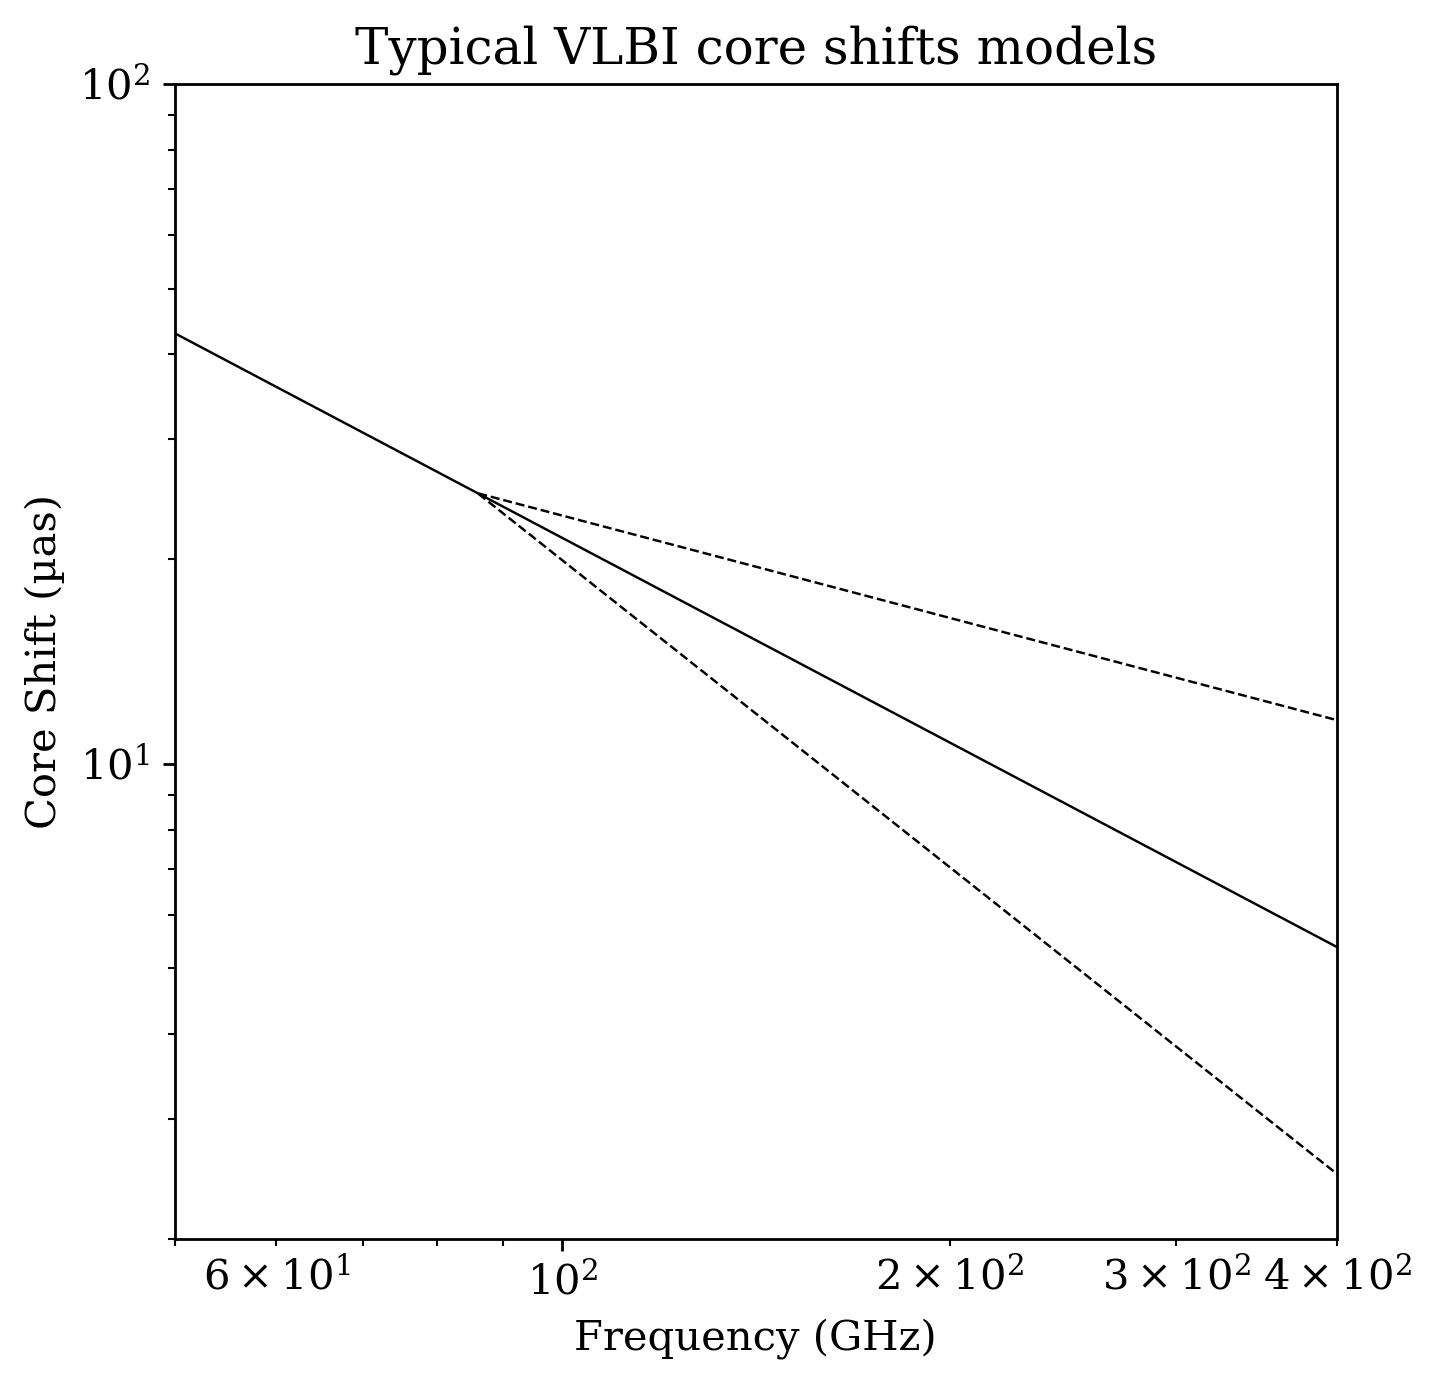

In [155]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=250)

freq = np.linspace(1, 400, 1600)  # Example frequency range in GHz

transform = mtransforms.blended_transform_factory(ax.transData,ax.transAxes)


# for i in range(len(coreshifts_AA532A38)):
#  ax.loglog(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0), label=coreshifts_AA532A38['Source'][i], color=((1 - i/20)/1, (1 - i/20)/2, 1 - i/70, 0.5))

ax.loglog(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-np.median(coreshifts_AA532A38['b_mas_GHz']), a=0)*1000 , color='black', linestyle='-', linewidth=0.7)

R_0_norm = -np.median(coreshifts_AA532A38['b_mas_GHz']) * 86 ** (1.5 -1)

R_0_norm_2 = -np.median(coreshifts_AA532A38['b_mas_GHz']) * 86 ** (.5 -1)

# ax.loglog(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-np.median(coreshifts_AA532A38['b_mas_GHz']), a=0), label='Core Shift', color='black', linestyle='--', linewidth=0.7)

ax.loglog(freq[freq > 86], ngeht_predictions.utilities.core_shift_freq_k_1(freq[freq > 86], nu_offset=0, R_0=R_0_norm, a=0, k=1.5)*1000, color='black', linestyle='--', linewidth=0.7)

ax.loglog(freq[freq > 86], ngeht_predictions.utilities.core_shift_freq_k_1(freq[freq > 86], nu_offset=0, R_0=R_0_norm_2, a=0, k=0.5)*1000, color='black', linestyle='--', linewidth=0.7)

#ax.loglog(freq, k_threshold)

# ax.vlines(86, 0, 1, color='black', linestyle='--', alpha=0.5, transform=transform)
# ax.vlines(230, 0, 1, color='black', linestyle='--', alpha=0.5, transform=transform)
# ax.vlines(345, 0, 1, color='black', linestyle='--', alpha=0.5, transform=transform)

# ax.text(86, 0.80, '86 GHz', fontsize=10, transform=transform, rotation=90, verticalalignment='bottom', horizontalalignment='right')
# ax.text(230, 0.8, '230 GHz', fontsize=10, transform=transform, rotation=90, verticalalignment='bottom', horizontalalignment='right')
# ax.text(345, 0.8, '345 GHz', fontsize=10, transform=transform, rotation=90, verticalalignment='bottom', horizontalalignment='right')

# ax.text(.256, 0.1, 'VLBA low frequency \nL,S,C,X,Ku', fontsize=13, transform=ax.transAxes, horizontalalignment='center',)

# # ax.axvspan(1.41, 15.4, color='lightgray', alpha=0.5, transform=transform,)

ax.set_xlim(50,400)
ax.set_ylim(2, 100)
ax.set_ylabel('Core Shift (µas)')
ax.set_xlabel('Frequency (GHz)')
ax.set_title('Typical VLBI core shifts models')

#ax.legend(bbox_to_anchor=(1.05, 1.00), loc='upper left')



Text(0.5, 1.0, 'Typical VLBI core shifts models')

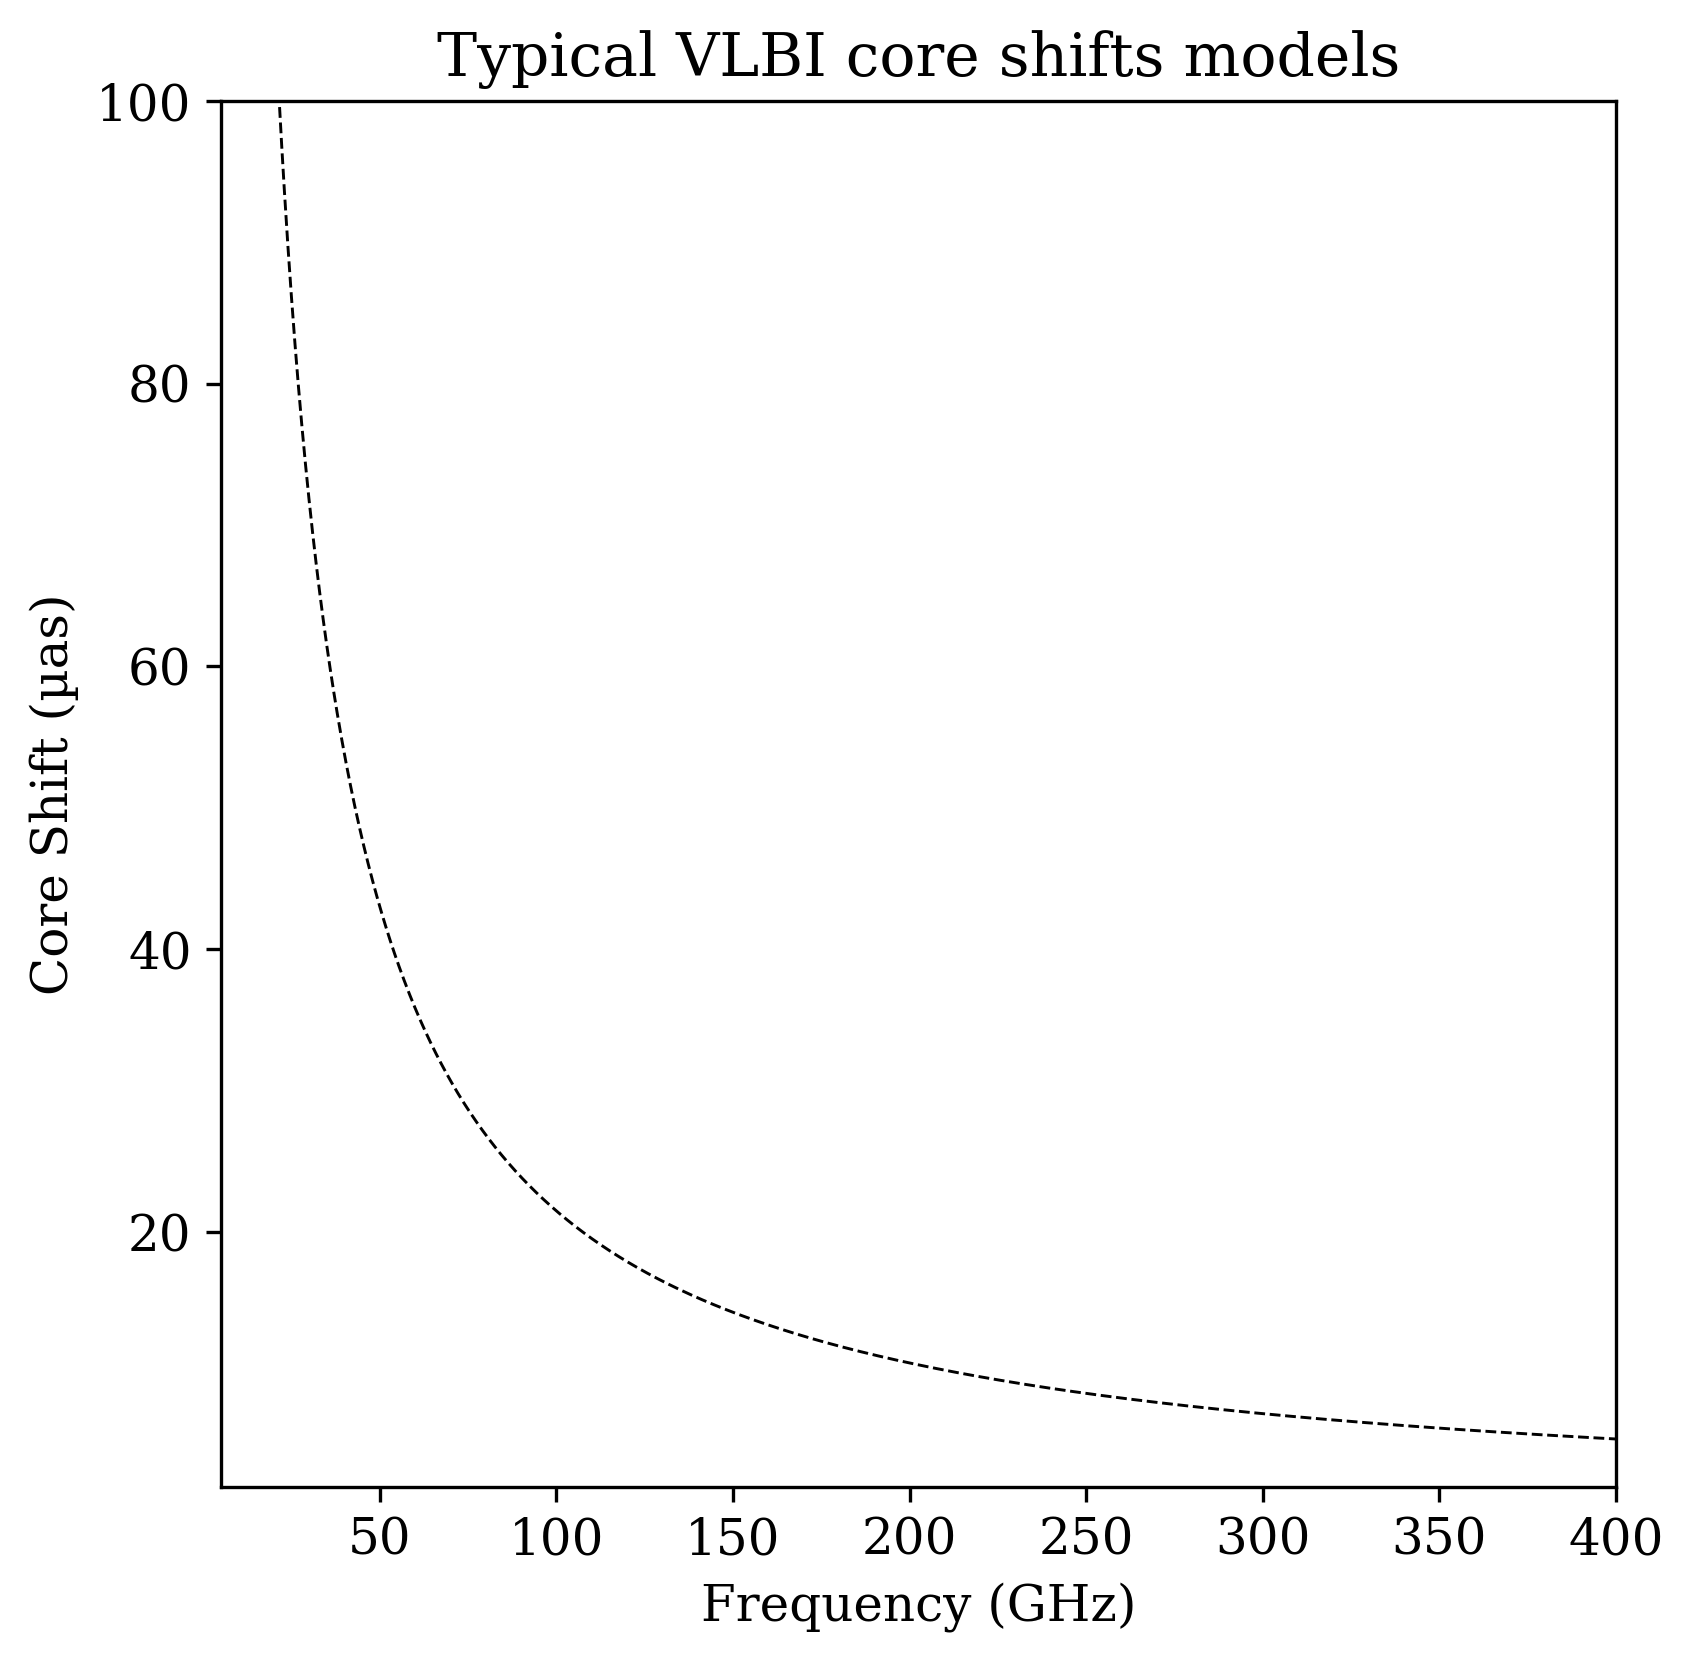

In [159]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

freq = np.linspace(1, 400, 1600)  # Example frequency range in GHz

transform = mtransforms.blended_transform_factory(ax.transData,ax.transAxes)
ax.plot(freq, ngeht_predictions.utilities.core_shift_freq_k(freq, R_0=-np.median(coreshifts_AA532A38['b_mas_GHz']), a=0)*1000 , color='black', linestyle='--', linewidth=0.7)

ax.set_xlim(5,400)
ax.set_ylim(2, 100)
ax.set_ylabel('Core Shift (µas)')
ax.set_xlabel('Frequency (GHz)')
ax.set_title('Typical VLBI core shifts models')

#ax.legend(bbox_to_anchor=(1.05, 1.00), loc='upper left')



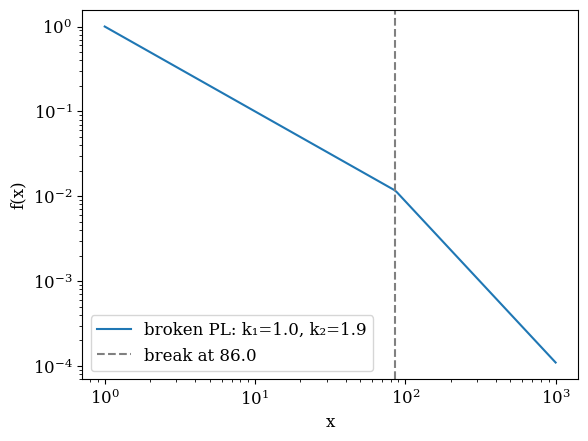

In [75]:
list = []
for i in range(len(coreshifts_AA532A38)):
    print(ngeht_predictions.utilities.core_shift_freq_k(230, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0))
    list.append(ngeht_predictions.utilities.core_shift_freq_k(230, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0))

0.016043478260869565
0.015956521739130435
0.014
0.013695652173913043
0.011
0.010782608695652174
0.010347826086956521
0.010347826086956521
0.009956521739130435
0.00956521739130435
0.009130434782608696
0.00791304347826087
0.007521739130434782
0.007304347826086957
0.006956521739130435
0.005956521739130435
0.005434782608695652
0.005
0.0046956521739130435
0.004521739130434783


In [28]:
list = np.array(list)
np.mean(list) * 1000

np.float64(9.306521739130435)

In [29]:
coreshifts = []
coreshifts_230_345 = []
coreshifts_86_345 = []
coreshifts_86_215 = []

for i in range(len(coreshifts_AA532A38)):

    cs = ngeht_predictions.utilities.core_shift_freq_k(86, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0) - ngeht_predictions.utilities.core_shift_freq_k(230, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)
    cs_230_345 = ngeht_predictions.utilities.core_shift_freq_k(230, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0) - ngeht_predictions.utilities.core_shift_freq_k(345, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)
    cs_86_345 = ngeht_predictions.utilities.core_shift_freq_k(86, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0) - ngeht_predictions.utilities.core_shift_freq_k(345, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)
    cs_86_215 = ngeht_predictions.utilities.core_shift_freq_k(86, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0) - ngeht_predictions.utilities.core_shift_freq_k(215, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)
    
    coreshifts_230_345.append(cs_230_345)
    coreshifts_86_345.append(cs_86_345)
    coreshifts.append(cs)
    coreshifts_86_215.append(cs_86_215)
    
coreshifts = np.array(coreshifts)
coreshifts_230_345 = np.array(coreshifts_230_345)
coreshifts_86_345 = np.array(coreshifts_86_345)
coreshifts_86_215 = np.array(coreshifts_86_215)

In [30]:
atm_noise

error = np.array([0, atm_noise])

In [31]:
atm_noise_alltennas

np.float64(0.002469401555260148)

In [32]:
atm_noise

np.float64(0.015011896689104125)

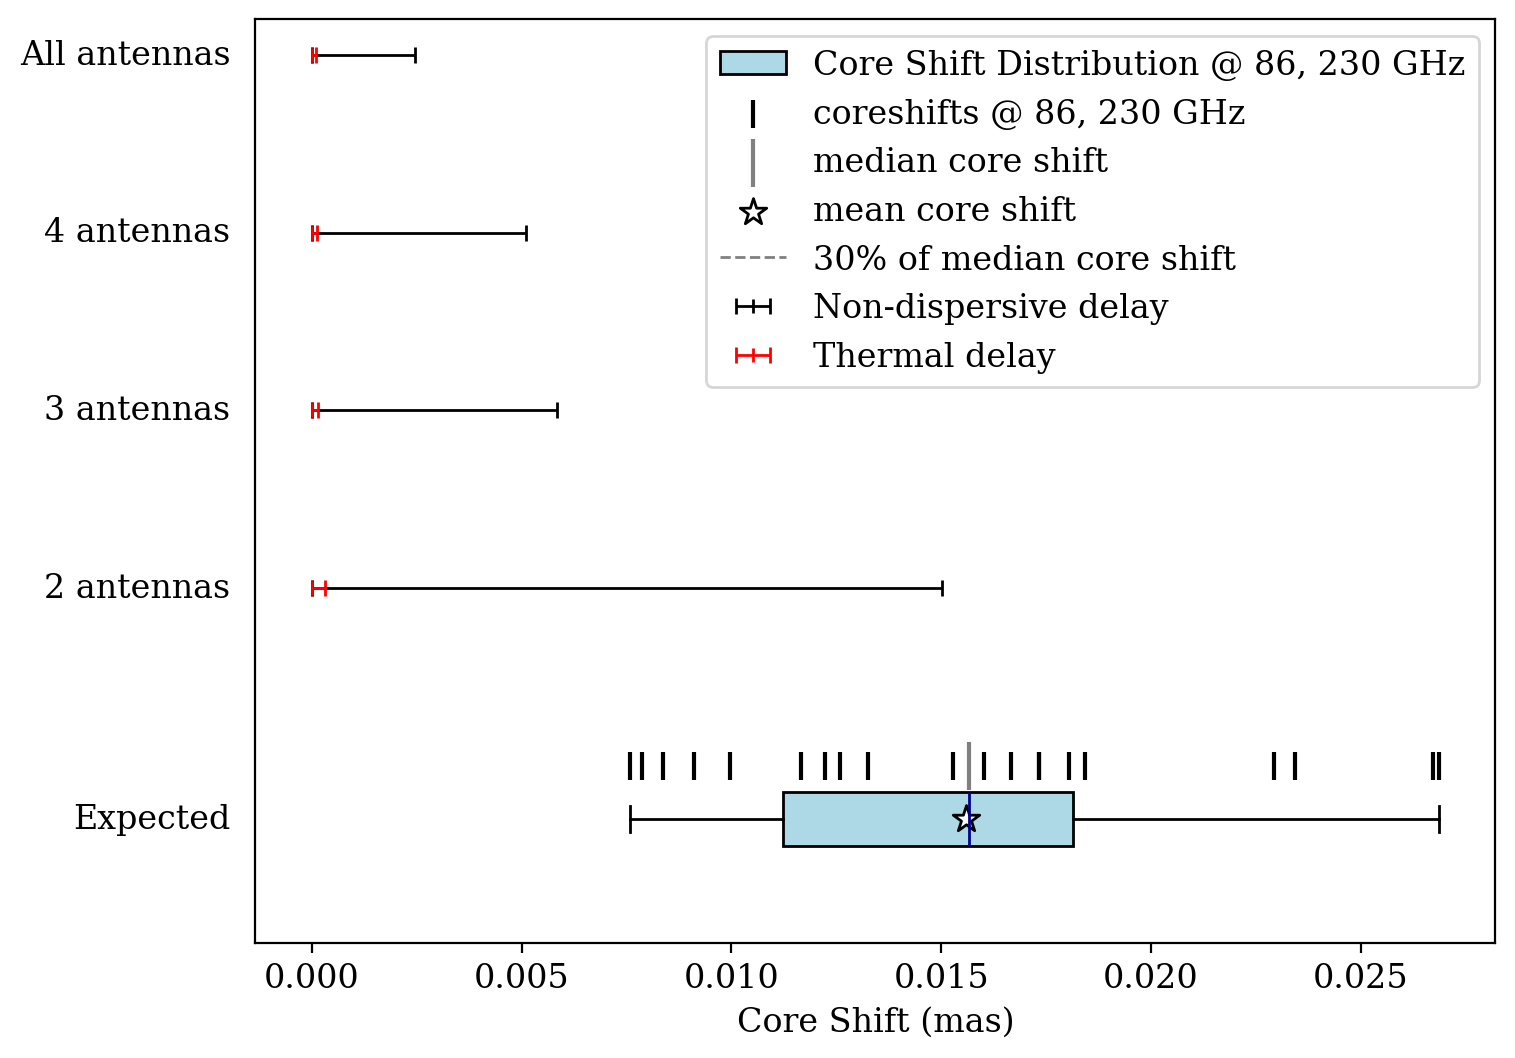

In [33]:
median_coreshift = np.median(coreshifts)
mean_coreshift = np.mean(coreshifts)

threshold = 0.3
median_coreshift_10per = median_coreshift * threshold

transform = mtransforms.blended_transform_factory(ax.transData,ax.transAxes)


atm_sigma_list = [atm_noise, atm_noise_3tennas, atm_noise_4tennas, atm_noise_alltennas]
antenna_list = ['2 antennas', '3 antennas', 'all antennas']
y = np.array(range(len(atm_sigma_list)))/2
x = [0] * len(atm_sigma_list)
xerr_atm = [[0] * len(atm_sigma_list), atm_sigma_list]


thermal_sigma_list = [mean_uncertainty, mean_uncertainty_3tennas, mean_uncertainty_4tennas, mean_uncertainty_alltennas]
y_thermal = np.array(range(len(thermal_sigma_list)))/2
x_thermal = [0] * len(thermal_sigma_list)
xerr_thermal = [[0] * len(thermal_sigma_list), thermal_sigma_list]


fig , ax = plt.subplots(figsize=(8, 6), dpi=200)

ax.boxplot(coreshifts,
           vert=False,            # horizontal box
           positions=[-.65],     # put it at y = –0.3
           widths=0.15,           # thickness of the box
           patch_artist=True,
           zorder=1,     
           boxprops=dict(facecolor='lightblue', edgecolor='black'),
           medianprops=dict(color='darkblue'),
           label='Core Shift Distribution @ 86, 230 GHz')


ax.scatter(coreshifts, coreshifts/coreshifts - 1.5, color='black', s=100, marker='|', label = 'coreshifts @ 86, 230 GHz' )
ax.scatter(median_coreshift,  - 0.5, color='gray', s=300, marker='|', label='median core shift')
ax.scatter(mean_coreshift, -0.65, s=100, color='w', marker='*', edgecolor='k', label='mean core shift')


ax.errorbar(x, y, xerr=xerr_atm, fmt='|', color='black', markersize=5, elinewidth=1, capsize=3, label='Non-dispersive delay', )
ax.errorbar(x_thermal, y_thermal, xerr=xerr_thermal, fmt='|', color='red', markersize=5, elinewidth=1, capsize=3, label='Thermal delay')

ax.vlines(median_coreshift_10per, 0, 1, color='gray', linestyle='--', linewidth=1, transform=transform, label=f'{int(threshold * 100)}% of median core shift')


ax.set_yticks([])
# ax.text(-.02, -.65, 'Core Shift', fontsize=12, rotation=90, transform=transform_r)


# 1) create the blend: x in axes, y in data
trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)

# 2) draw your text at y = -0.65, x = just off the left (axes coords)
ax.text(-0.02,            # slightly left of the axis (axes coords)
    -0.65,            # your data‐y location
    "Expected",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center',
    # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    0,            # your data‐y location
    "2 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    0.5,            # your data‐y location
    "3 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1,            # your data‐y location
    "4 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1.5,            # your data‐y location
    "All antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.set_ylim(-1, 1.6)


ax.set_xlabel('Core Shift (mas)')
ax.legend()


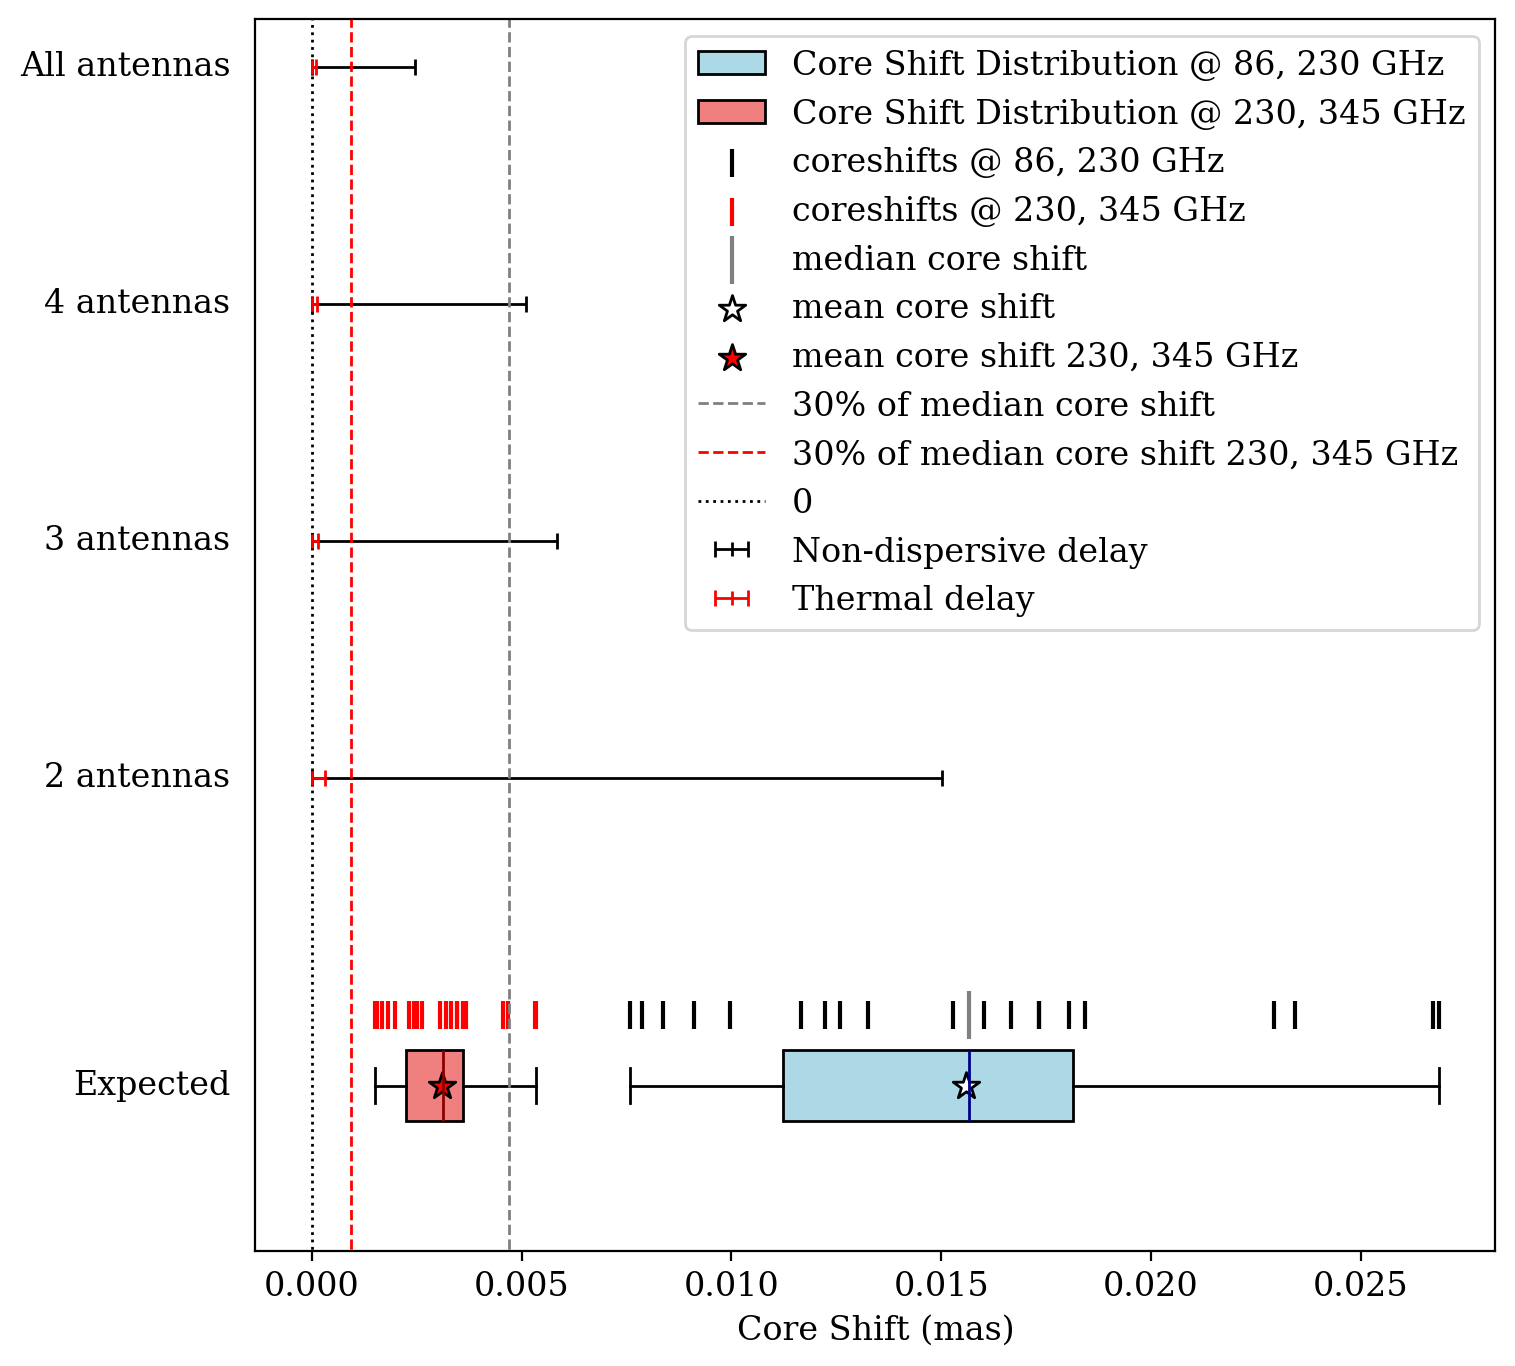

In [34]:
median_coreshift = np.median(coreshifts)
mean_coreshift = np.mean(coreshifts)

median_coreshift_230_345 = np.median(coreshifts_230_345)
mean_coreshift_230_345 = np.mean(coreshifts_230_345)

threshold = 0.3
median_coreshift_10per = median_coreshift * threshold
median_coreshift_10per_230_345 = median_coreshift_230_345 * threshold

atm_sigma_list = [atm_noise, atm_noise_3tennas, atm_noise_4tennas, atm_noise_alltennas]
antenna_list = ['2 antennas', '3 antennas', 'all antennas']
y = np.array(range(len(atm_sigma_list)))/2
x = [0] * len(atm_sigma_list)
xerr_atm = [[0] * len(atm_sigma_list), atm_sigma_list]


thermal_sigma_list = [mean_uncertainty, mean_uncertainty_3tennas, mean_uncertainty_4tennas, mean_uncertainty_alltennas]
y_thermal = np.array(range(len(thermal_sigma_list)))/2
x_thermal = [0] * len(thermal_sigma_list)
xerr_thermal = [[0] * len(thermal_sigma_list), thermal_sigma_list]


fig , ax = plt.subplots(figsize=(8, 8), dpi=200)

ax.boxplot(coreshifts,
           vert=False,            # horizontal box
           positions=[-.65],     # put it at y = –0.3
           widths=0.15,           # thickness of the box
           patch_artist=True,
           zorder=1,     
           boxprops=dict(facecolor='lightblue', edgecolor='black'),
           medianprops=dict(color='darkblue'),
           label='Core Shift Distribution @ 86, 230 GHz')

ax.boxplot(coreshifts_230_345,
              vert=False,            # horizontal box
                positions=[-.65],     # put it at y = –0.3
                widths=0.15,           # thickness of the box
                patch_artist=True,
                zorder=1,
                boxprops=dict(facecolor='lightcoral', edgecolor='black'),
                medianprops=dict(color='darkred'),
                label='Core Shift Distribution @ 230, 345 GHz')




ax.scatter(coreshifts, coreshifts/coreshifts - 1.5, color='black', s=100, marker='|', label = 'coreshifts @ 86, 230 GHz' )
ax.scatter(coreshifts_230_345, coreshifts_230_345/coreshifts_230_345 - 1.5, color='red', s=100, marker='|', label = 'coreshifts @ 230, 345 GHz' )
ax.scatter(median_coreshift,  - 0.5, color='gray', s=300, marker='|', label='median core shift')
ax.scatter(mean_coreshift, -0.65, s=100, color='w', marker='*', edgecolor='k', label='mean core shift')

ax.scatter(mean_coreshift_230_345, -0.65, s=100, color='red', marker='*', edgecolor='k', label='mean core shift 230, 345 GHz')

transform = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.errorbar(x, y, xerr=xerr_atm, fmt='|', color='black', markersize=5, elinewidth=1, capsize=3, label='Non-dispersive delay', )
ax.errorbar(x_thermal, y_thermal, xerr=xerr_thermal, fmt='|', color='red', markersize=5, elinewidth=1, capsize=3, label='Thermal delay')

ax.vlines(median_coreshift_10per, -1, 1, color='gray', linestyle='--', linewidth=1, transform=transform, label=f'{int(threshold * 100)}% of median core shift')
ax.vlines(median_coreshift_10per_230_345, -1, 1, color='red', linestyle='--', linewidth=1, transform=transform, label=f'{int(threshold * 100)}% of median core shift 230, 345 GHz')
ax.vlines(0, -1, 1, color='black', linestyle=':', linewidth=1, transform=transform, label='0')

ax.set_yticks([])
# ax.text(-.02, -.65, 'Core Shift', fontsize=12, rotation=90, transform=transform_r)


# 1) create the blend: x in axes, y in data
trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)

# 2) draw your text at y = -0.65, x = just off the left (axes coords)
ax.text(-0.02,            # slightly left of the axis (axes coords)
    -0.65,            # your data‐y location
    "Expected",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center',
    # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    0,            # your data‐y location
    "2 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    0.5,            # your data‐y location
    "3 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1,            # your data‐y location
    "4 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1.5,            # your data‐y location
    "All antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.set_ylim(-1, 1.6)


ax.set_xlabel('Core Shift (mas)')
ax.legend()


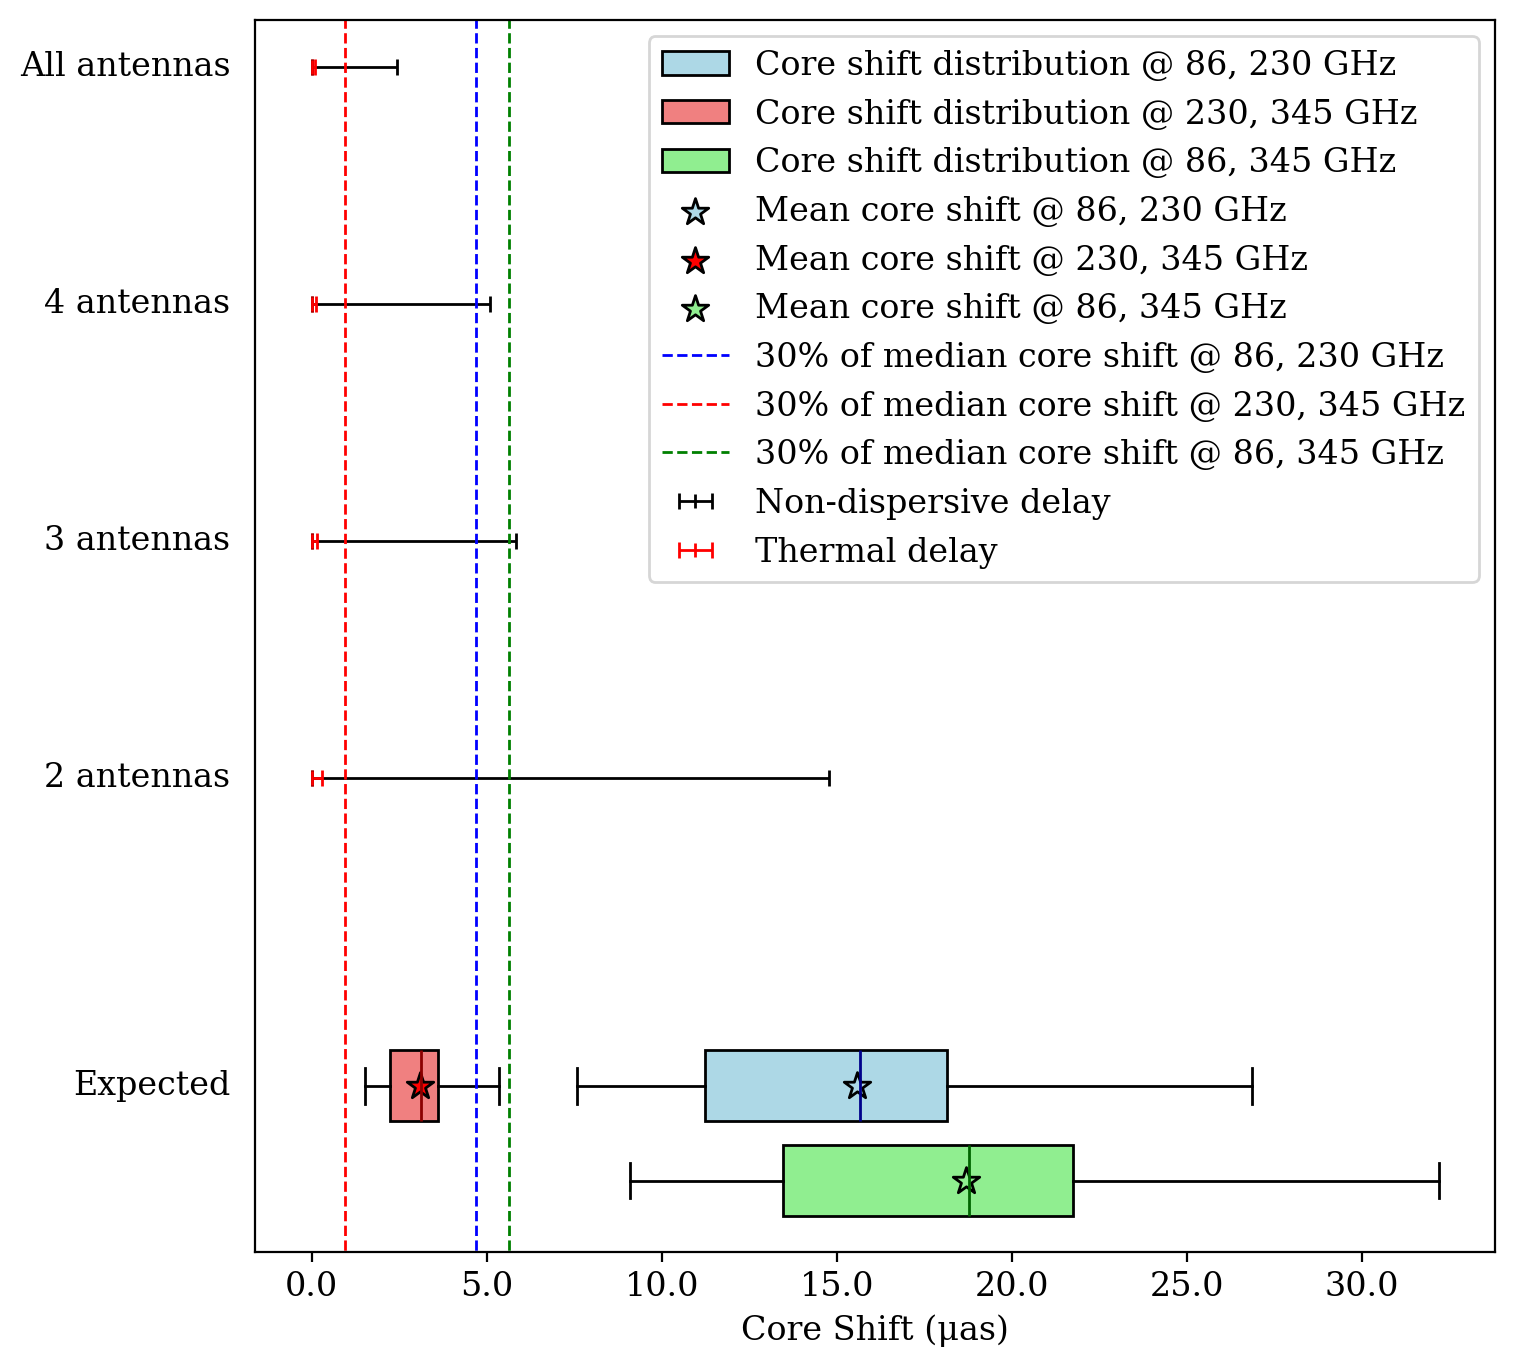

In [58]:
median_coreshift = np.median(coreshifts)
mean_coreshift = np.mean(coreshifts)

median_coreshift_230_345 = np.median(coreshifts_230_345)
mean_coreshift_230_345 = np.mean(coreshifts_230_345)

median_coreshift_86_345 = np.median(coreshifts_86_345)
mean_coreshift_86_345 = np.mean(coreshifts_86_345)


threshold = 0.3
median_coreshift_10per = median_coreshift * threshold
median_coreshift_10per_230_345 = median_coreshift_230_345 * threshold
median_coreshift_10per_86_345 = median_coreshift_86_345 * threshold
median_coreshift_10per_86_345 = median_coreshift_86_345 * threshold

atm_sigma_list = [atm_noise, atm_noise_3tennas, atm_noise_4tennas, atm_noise_alltennas]
y = np.array(range(len(atm_sigma_list)))/2
x = [0] * len(atm_sigma_list)
xerr_atm = [[0] * len(atm_sigma_list), atm_sigma_list]

thermal_sigma_list = [mean_uncertainty, mean_uncertainty_3tennas, mean_uncertainty_4tennas, mean_uncertainty_alltennas]
y_thermal = np.array(range(len(thermal_sigma_list)))/2
x_thermal = [0] * len(thermal_sigma_list)
xerr_thermal = [[0] * len(thermal_sigma_list), thermal_sigma_list]

fig , ax = plt.subplots(figsize=(8, 8), dpi=200)

ax.boxplot(coreshifts,
           vert=False,            # horizontal box
           positions=[-.65],     # put it at y = –0.3
           widths=0.15,           # thickness of the box
           patch_artist=True,
           zorder=1,     
           boxprops=dict(facecolor='lightblue', edgecolor='black'),
           medianprops=dict(color='darkblue'),
           label='Core shift distribution @ 86, 230 GHz')

ax.boxplot(coreshifts_230_345,
              vert=False,            # horizontal box
                positions=[-.65],     # put it at y = –0.3
                widths=0.15,           # thickness of the box
                patch_artist=True,
                zorder=1,
                boxprops=dict(facecolor='lightcoral', edgecolor='black'),
                medianprops=dict(color='darkred'),
                label='Core shift distribution @ 230, 345 GHz')

ax.boxplot(coreshifts_86_345,
                vert=False,            # horizontal box
                positions=[-.85],     # put it at y = –0.3
                widths=0.15,           # thickness of the box
                patch_artist=True,
                zorder=1,
                boxprops=dict(facecolor='lightgreen', edgecolor='black'),
                medianprops=dict(color='darkgreen'),
                label='Core shift distribution @ 86, 345 GHz')




# ax.scatter(coreshifts, coreshifts/coreshifts - 1.5, color='black', s=100, marker='|', label = 'coreshifts @ 86, 230 GHz' )
# ax.scatter(coreshifts_230_345, coreshifts_230_345/coreshifts_230_345 - 1.5, color='red', s=100, marker='|', label = 'coreshifts @ 230, 345 GHz' )
#ax.scatter(median_coreshift,  - 0.5, color='gray', s=300, marker='|', label='median core shift')
ax.scatter(mean_coreshift, -0.65, s=100, color='lightblue', marker='*', edgecolor='k', label='Mean core shift @ 86, 230 GHz')
ax.scatter(mean_coreshift_230_345, -0.65, s=100, color='red', marker='*', edgecolor='k', label='Mean core shift @ 230, 345 GHz')
ax.scatter(mean_coreshift_86_345, -0.85, s=100, color='lightgreen', marker='*', edgecolor='k', label='Mean core shift @ 86, 345 GHz')

transform = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.errorbar(x, y, xerr=xerr_atm, fmt='|', color='black', markersize=5, elinewidth=1, capsize=3, label='Non-dispersive delay', )
ax.errorbar(x_thermal, y_thermal, xerr=xerr_thermal, fmt='|', color='red', markersize=5, elinewidth=1, capsize=3, label='Thermal delay')

ax.vlines(median_coreshift_10per, -1, 1, color='blue', linestyle='--', linewidth=1, transform=transform, label=f'{int(threshold * 100)}% of median core shift @ 86, 230 GHz')
ax.vlines(median_coreshift_10per_230_345, -1, 1, color='red', linestyle='--', linewidth=1, transform=transform, label=f'{int(threshold * 100)}% of median core shift @ 230, 345 GHz')
ax.vlines(median_coreshift_10per_86_345, -1, 1, color='green', linestyle='--', linewidth=1, transform=transform, label=f'{int(threshold * 100)}% of median core shift @ 86, 345 GHz')
#ax.vlines(0, -1, 1, color='black', linestyle=':', linewidth=1, transform=transform, label='0')

ax.set_yticks([])

trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    -0.65,            # your data‐y location
    "Expected",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center',
    # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    0,            # your data‐y location
    "2 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    0.5,            # your data‐y location
    "3 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1,            # your data‐y location
    "4 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1.5,            # your data‐y location
    "All antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.set_ylim(-1, 1.6)
from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1000:.1f}'))
ax.set_xlabel('Core Shift (μas)')  # Update label accordingly

ax.legend()

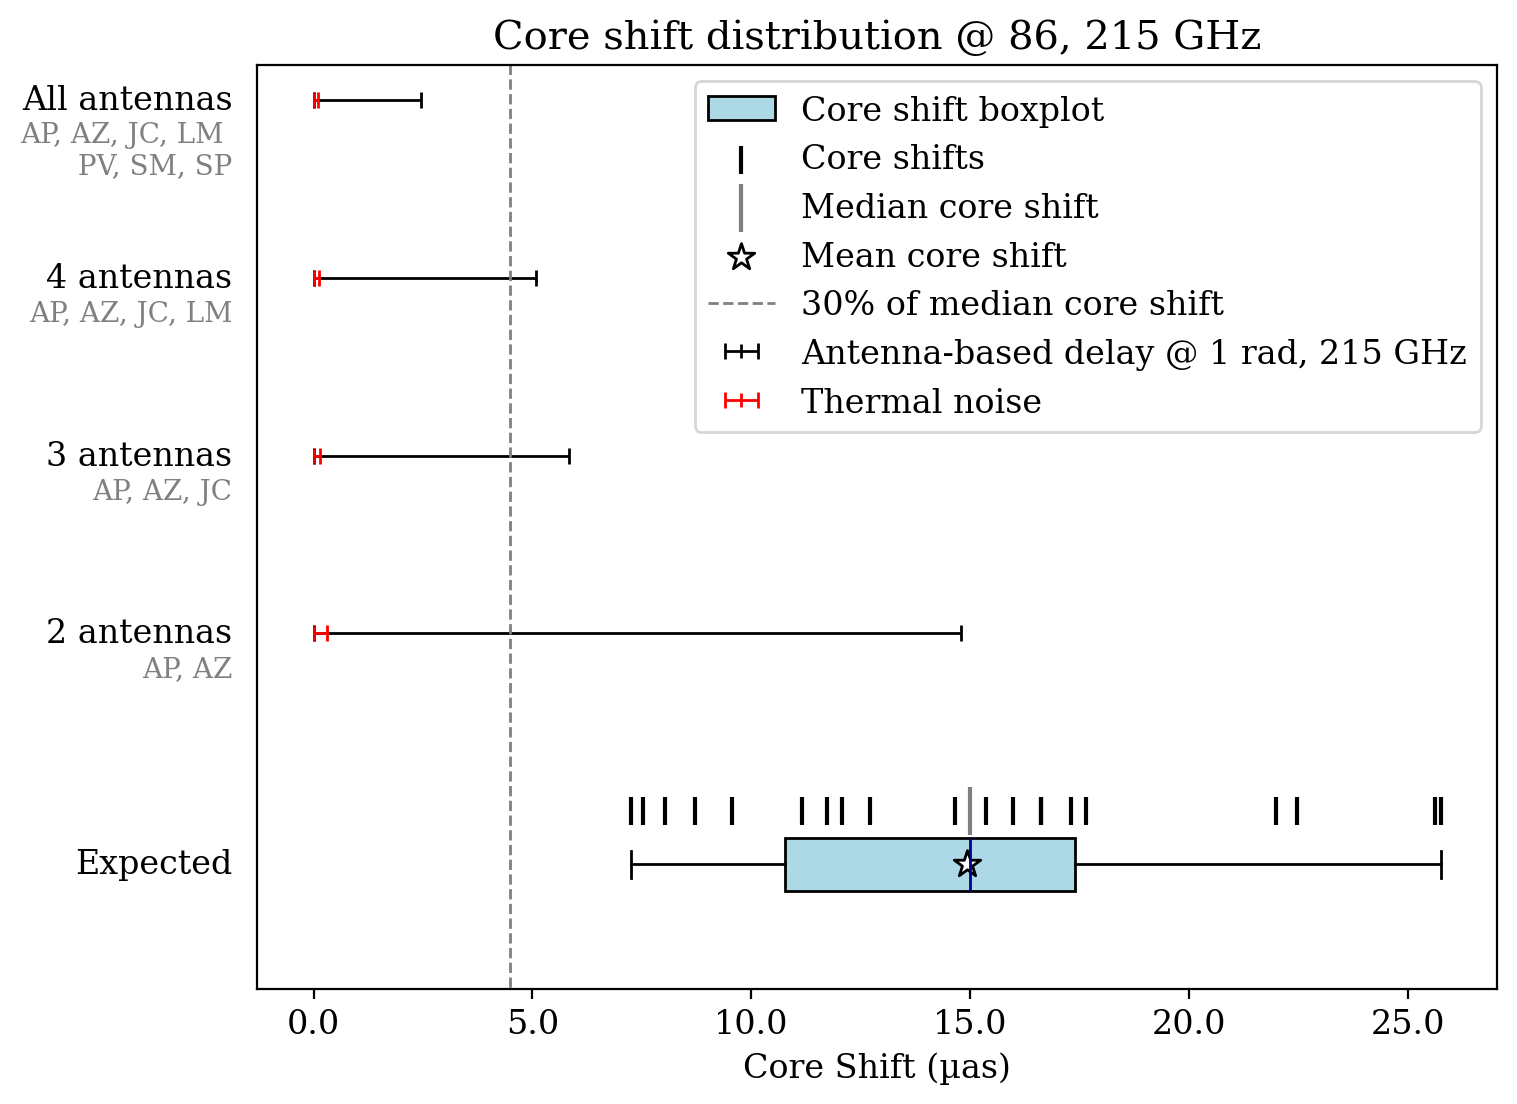

In [79]:
# 86 GHz to 215 GHz

# errors for a typical (average) scan 

median_coreshift_86_215 = np.median(coreshifts_86_215)
mean_coreshift_86_215 = np.mean(coreshifts_86_215)

threshold = .3
mean_coreshift_86_215_10per = mean_coreshift_86_215 * threshold

transform = mtransforms.blended_transform_factory(ax.transData,ax.transAxes)


atm_sigma_list = [atm_noise, atm_noise_3tennas, atm_noise_4tennas, atm_noise_alltennas]
y = np.array(range(len(atm_sigma_list)))/2
x = [0] * len(atm_sigma_list)
xerr_atm = [[0] * len(atm_sigma_list), atm_sigma_list]


thermal_sigma_list = [mean_uncertainty, mean_uncertainty_3tennas, mean_uncertainty_4tennas, mean_uncertainty_alltennas]
y_thermal = np.array(range(len(thermal_sigma_list)))/2
x_thermal = [0] * len(thermal_sigma_list)
xerr_thermal = [[0] * len(thermal_sigma_list), thermal_sigma_list]


fig , ax = plt.subplots(figsize=(8, 6), dpi=200)

ax.boxplot(coreshifts_86_215,
           vert=False,            # horizontal box
           positions=[-.65],     # put it at y = –0.3
           widths=0.15,           # thickness of the box
           patch_artist=True,
           zorder=1,     
           boxprops=dict(facecolor='lightblue', edgecolor='black'),
           medianprops=dict(color='darkblue'),
           label='Core shift boxplot')


ax.scatter(coreshifts_86_215, coreshifts_86_215/coreshifts_86_215 - 1.5, color='black', s=100, marker='|', label = 'Core shifts' )
ax.scatter(median_coreshift_86_215, - 0.5, color='gray', s=300, marker='|', label='Median core shift')
ax.scatter(mean_coreshift_86_215, -0.65, s=100, color='w', marker='*', edgecolor='k', label='Mean core shift')

ax.errorbar(x, y, xerr=xerr_atm, fmt='|', color='black', markersize=5, elinewidth=1, capsize=3, label='Antenna-based delay @ 1 rad, 215 GHz', )
ax.errorbar(x_thermal, y_thermal, xerr=xerr_thermal, fmt='|', color='red', markersize=5, elinewidth=1, capsize=3, label='Thermal noise')

ax.vlines(mean_coreshift_86_215_10per, -100, 100, color='gray', linestyle='--', linewidth=1, label=f'{int(threshold * 100)}% of median core shift')


ax.set_yticks([])
# ax.text(-.02, -.65, 'Core Shift', fontsize=12, rotation=90, transform=transform_r)


# 1) create the blend: x in axes, y in data
trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)

# 2) draw your text at y = -0.65, x = just off the left (axes coords)
ax.text(-0.02,            # slightly left of the axis (axes coords)
    -0.65,            # your data‐y location
    "Expected",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center',
    # vertically centered on the y = -0.65 line
)

ax.text(-0.02, 0, "2 antennas", transform=trans, ha='right',va='center')

ax.text(-0.02, -0.1, "AP, AZ", transform=trans, ha='right',va='center', color='gray', fontsize=10)


ax.text(-0.02,            # slightly left of the axis (axes coords)
    0.5,            # your data‐y location
    "3 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02, 0.4, "AP, AZ, JC", transform=trans, ha='right',va='center', color='gray', fontsize=10)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1,            # your data‐y location
    "4 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02, 0.9, "AP, AZ, JC, LM", transform=trans, ha='right',va='center', color='gray', fontsize=10)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1.5,            # your data‐y location
    "All antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02, 1.36, "AP, AZ, JC, LM \n PV, SM, SP", transform=trans, ha='right',va='center', color='gray', fontsize=10)

ax.set_ylim(-1, 1.6)


ax.set_xlabel('Core Shift (µas)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1000:.1f}'))  # Convert to μas

ax.set_title('Core shift distribution @ 86, 215 GHz')
ax.legend()


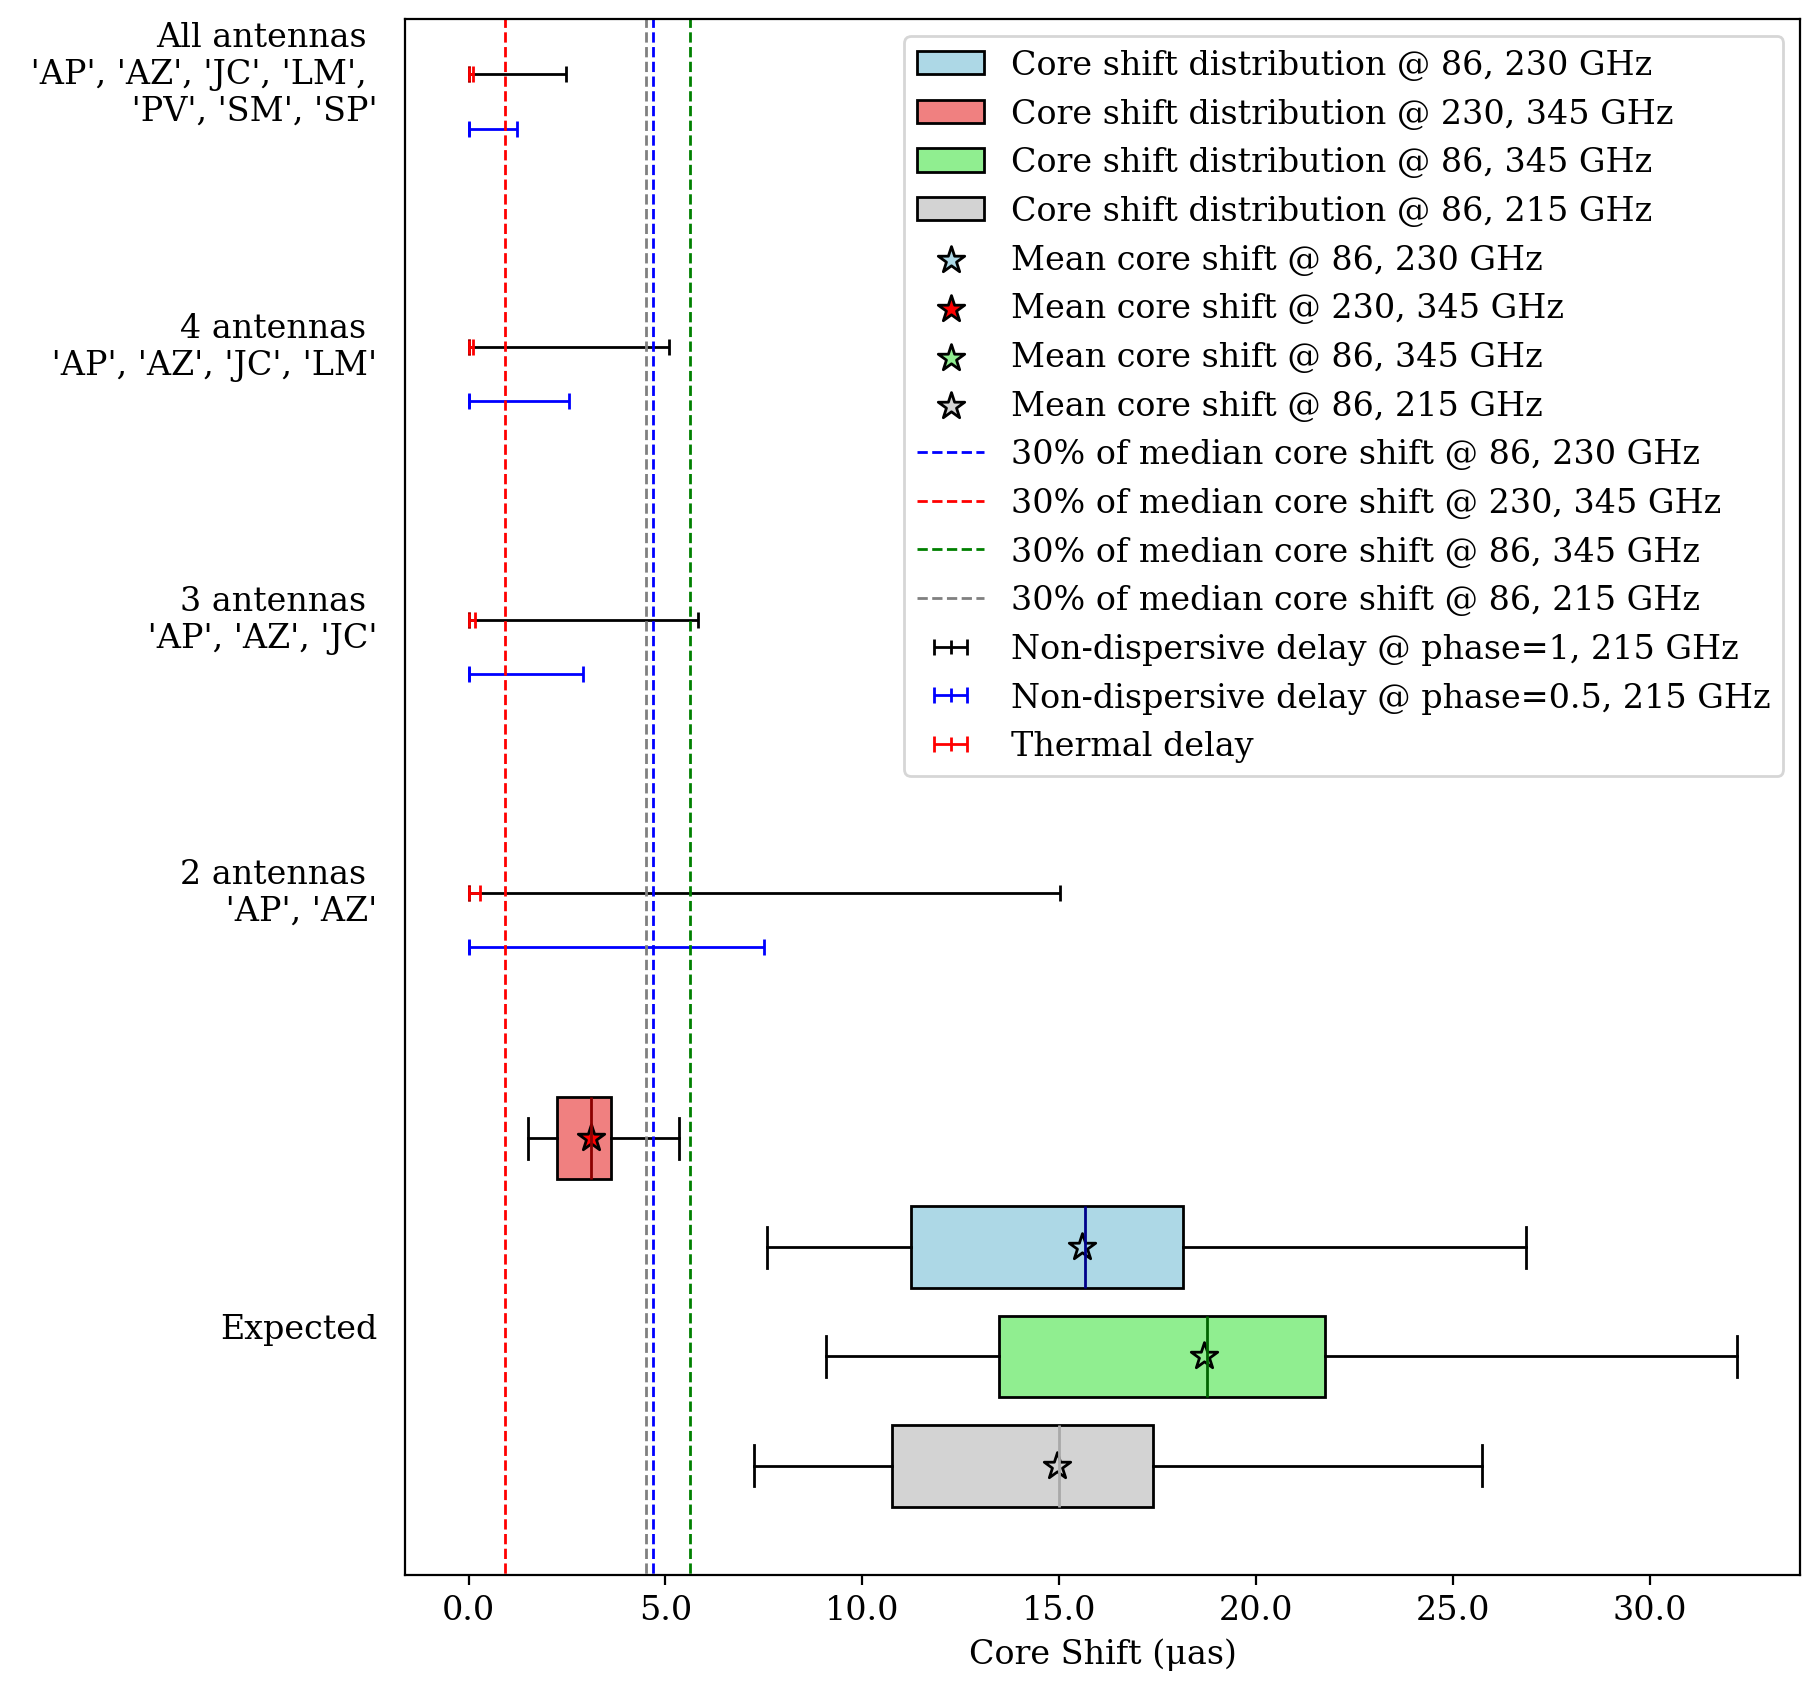

In [ ]:
median_coreshift = np.median(coreshifts)
mean_coreshift = np.mean(coreshifts)

median_coreshift_230_345 = np.median(coreshifts_230_345)
mean_coreshift_230_345 = np.mean(coreshifts_230_345)

median_coreshift_86_345 = np.median(coreshifts_86_345)
mean_coreshift_86_345 = np.mean(coreshifts_86_345)

median_coreshift_86_215 = np.median(coreshifts_86_215)
mean_coreshift_86_215 = np.mean(coreshifts_86_215)

threshold = 0.3
median_coreshift_10per = median_coreshift * threshold
median_coreshift_10per_230_345 = median_coreshift_230_345 * threshold
median_coreshift_10per_86_345 = median_coreshift_86_345 * threshold
median_coreshift_10per_86_345 = median_coreshift_86_345 * threshold
median_coreshift_10per_86_215 = median_coreshift_86_215 * threshold

atm_sigma_list = [atm_noise, atm_noise_3tennas, atm_noise_4tennas, atm_noise_alltennas]
atm_sigma_phase_05 = [atm_noise_2tennas_phase_05, atm_noise_3tennas_phase_05, atm_noise_4tennas_phase_05,  atm_noise_alltennas_phase_05]
y = np.array(range(len(atm_sigma_list)))/2
x = [0] * len(atm_sigma_list)
xerr_atm = [[0] * len(atm_sigma_list), atm_sigma_list]
xerr_atm_phase_05 = [[0] * len(atm_sigma_phase_05), atm_sigma_phase_05]

thermal_sigma_list = [mean_uncertainty, mean_uncertainty_3tennas, mean_uncertainty_4tennas, mean_uncertainty_alltennas]
y_thermal = np.array(range(len(thermal_sigma_list)))/2
x_thermal = [0] * len(thermal_sigma_list)
xerr_thermal = [[0] * len(thermal_sigma_list), thermal_sigma_list]

fig , ax = plt.subplots(figsize=(9, 10.1), dpi=200)

ax.boxplot(coreshifts,
           vert=False,            # horizontal box
           positions=[-.65],     # put it at y = –0.3
           widths=0.15,           # thickness of the box
           patch_artist=True,
           zorder=1,     
           boxprops=dict(facecolor='lightblue', edgecolor='black'),
           medianprops=dict(color='darkblue'),
           label='Core shift distribution @ 86, 230 GHz')

ax.boxplot(coreshifts_230_345,
              vert=False,            # horizontal box
                positions=[-.45],     # put it at y = –0.3
                widths=0.15,           # thickness of the box
                patch_artist=True,
                zorder=1,
                boxprops=dict(facecolor='lightcoral', edgecolor='black'),
                medianprops=dict(color='darkred'),
                label='Core shift distribution @ 230, 345 GHz')

ax.boxplot(coreshifts_86_345,
                vert=False,            # horizontal box
                positions=[-.85],     # put it at y = –0.3
                widths=0.15,           # thickness of the box
                patch_artist=True,
                zorder=1,
                boxprops=dict(facecolor='lightgreen', edgecolor='black'),
                medianprops=dict(color='darkgreen'),
                label='Core shift distribution @ 86, 345 GHz')

ax.boxplot(coreshifts_86_215,
                vert=False,            # horizontal box
                positions=[-1.05],     # put it at y = –0.3
                widths=0.15,           # thickness of the box
                patch_artist=True,
                zorder=1,   
                boxprops=dict(facecolor='lightgray', edgecolor='black'),
                medianprops=dict(color='darkgray'),
                label='Core shift distribution @ 86, 215 GHz')





# ax.scatter(coreshifts, coreshifts/coreshifts - 1.5, color='black', s=100, marker='|', label = 'coreshifts @ 86, 230 GHz' )
# ax.scatter(coreshifts_230_345, coreshifts_230_345/coreshifts_230_345 - 1.5, color='red', s=100, marker='|', label = 'coreshifts @ 230, 345 GHz' )
#ax.scatter(median_coreshift,  - 0.5, color='gray', s=300, marker='|', label='median core shift')
ax.scatter(mean_coreshift, -0.65, s=100, color='lightblue', marker='*', edgecolor='k', label='Mean core shift @ 86, 230 GHz')
ax.scatter(mean_coreshift_230_345, -0.45, s=100, color='red', marker='*', edgecolor='k', label='Mean core shift @ 230, 345 GHz')
ax.scatter(mean_coreshift_86_345, -0.85, s=100, color='lightgreen', marker='*', edgecolor='k', label='Mean core shift @ 86, 345 GHz')
ax.scatter(mean_coreshift_86_215, -1.05, s=100, color='lightgray', marker='*', edgecolor='k', label='Mean core shift @ 86, 215 GHz')

transform = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.errorbar(x, y, xerr=xerr_atm, fmt='|', color='black', markersize=5, elinewidth=1, capsize=3, label='Non-dispersive delay @ phase=1, 215 GHz', )
ax.errorbar(x, y-0.1, xerr=xerr_atm_phase_05, fmt='|', color='blue', markersize=5, elinewidth=1, capsize=3, label='Non-dispersive delay @ phase=0.5, 215 GHz', )
ax.errorbar(x_thermal, y_thermal, xerr=xerr_thermal, fmt='|', color='red', markersize=5, elinewidth=1, capsize=3, label='Thermal delay')

ax.vlines(median_coreshift_10per, -1, 1, color='blue', linestyle='--', linewidth=1, transform=transform, label=f'{int(threshold * 100)}% of median core shift @ 86, 230 GHz')
ax.vlines(median_coreshift_10per_230_345, -1, 1, color='red', linestyle='--', linewidth=1, transform=transform, label=f'{int(threshold * 100)}% of median core shift @ 230, 345 GHz')
ax.vlines(median_coreshift_10per_86_345, -1, 1, color='green', linestyle='--', linewidth=1, transform=transform, label=f'{int(threshold * 100)}% of median core shift @ 86, 345 GHz')
ax.vlines(median_coreshift_10per_86_215, -1, 1, color='gray', linestyle='--', linewidth=1, transform=transform, label=f'{int(threshold * 100)}% of median core shift @ 86, 215 GHz')
#ax.vlines(0, -1, 1, color='black', linestyle=':', linewidth=1, transform=transform, label='0')

ax.set_yticks([])

trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    -0.8,            # your data‐y location
    "Expected",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center',
    # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    0,            # your data‐y location
    "2 antennas \n 'AP', 'AZ'",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    0.5,            # your data‐y location
    "3 antennas \n 'AP', 'AZ', 'JC'",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1,            # your data‐y location
    "4 antennas \n 'AP', 'AZ', 'JC', 'LM'",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1.5,            # your data‐y location
    "All antennas \n 'AP', 'AZ', 'JC', 'LM', \n 'PV', 'SM', 'SP'",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)


ax.set_ylim(-1.25, 1.6)
from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1000:.1f}'))
ax.set_xlabel('Core Shift (μas)')  # Update label accordingly

ax.legend()

In [38]:
from ngeht_predictions import utilities

In [39]:
import ngeht_predictions.utilities


ngeht_predictions.utilities.atm_phase_error(1, 215)

np.float64(0.007176846612310724)

In [ ]:
# 86 GHz to 215 GHz

median_coreshift_86_215 = np.median(coreshifts_86_215)
mean_coreshift_86_215 = np.mean(coreshifts_86_215)

threshold = .3
mean_coreshift_86_215_10per = mean_coreshift_86_215 * threshold

transform = mtransforms.blended_transform_factory(ax.transData,ax.transAxes)


atm_sigma_list = [atm_noise, atm_noise_3tennas, atm_noise_4tennas, atm_noise_alltennas]
antenna_list = ['2 antennas', '3 antennas', 'all antennas']
y = np.array(range(len(atm_sigma_list)))/2
x = [0] * len(atm_sigma_list)
xerr_atm = [[0] * len(atm_sigma_list), atm_sigma_list]


thermal_sigma_list = [mean_uncertainty, mean_uncertainty_3tennas, mean_uncertainty_4tennas, mean_uncertainty_alltennas]
y_thermal = np.array(range(len(thermal_sigma_list)))/2
x_thermal = [0] * len(thermal_sigma_list)
xerr_thermal = [[0] * len(thermal_sigma_list), thermal_sigma_list]


fig , ax = plt.subplots(figsize=(8, 6), dpi=200)

ax.boxplot(coreshifts_86_215,
           vert=False,            # horizontal box
           positions=[-.65],     # put it at y = –0.3
           widths=0.15,           # thickness of the box
           patch_artist=True,
           zorder=1,     
           boxprops=dict(facecolor='lightblue', edgecolor='black'),
           medianprops=dict(color='darkblue'),
           label='Core Shift Distribution @ 86, 215 GHz')


ax.scatter(coreshifts_86_215, coreshifts_86_215/coreshifts_86_215 - 1.5, color='black', s=100, marker='|', label = 'coreshifts @ 86, 215 GHz' )
ax.scatter(median_coreshift_86_215, - 0.5, color='gray', s=300, marker='|', label='median core shift @ 215 GHz')
ax.scatter(mean_coreshift_86_215, -0.65, s=100, color='w', marker='*', edgecolor='k', label='mean core shift @ 215 GHz')

ax.errorbar(x, y, xerr=xerr_atm, fmt='|', color='black', markersize=5, elinewidth=1, capsize=3, label='Non-dispersive delay', )
ax.errorbar(x_thermal, y_thermal, xerr=xerr_thermal, fmt='|', color='red', markersize=5, elinewidth=1, capsize=3, label='Thermal delay')

ax.vlines(mean_coreshift_86_215_10per, -100, 100, color='gray', linestyle='--', linewidth=1, label=f'{int(threshold * 100)}% of median core shift @ 86, 215 GHz')


ax.set_yticks([])
# ax.text(-.02, -.65, 'Core Shift', fontsize=12, rotation=90, transform=transform_r)


# 1) create the blend: x in axes, y in data
trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)

# 2) draw your text at y = -0.65, x = just off the left (axes coords)
ax.text(-0.02,            # slightly left of the axis (axes coords)
    -0.65,            # your data‐y location
    "Expected",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center',
    # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    0,            # your data‐y location
    "2 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    0.5,            # your data‐y location
    "3 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1,            # your data‐y location
    "4 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1.5,            # your data‐y location
    "All antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.set_ylim(-1, 1.6)


ax.set_xlabel('Core Shift (µas)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1000:.1f}'))  # Convert to μas

ax.legend()